In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from catboost import CatBoostClassifier
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#pip install imbalanced-learn

In [3]:
df = pd.read_csv("weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Data Exploration

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [9]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
#pip install pandas-profiling

In [11]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='report.html')

<AxesSubplot:>

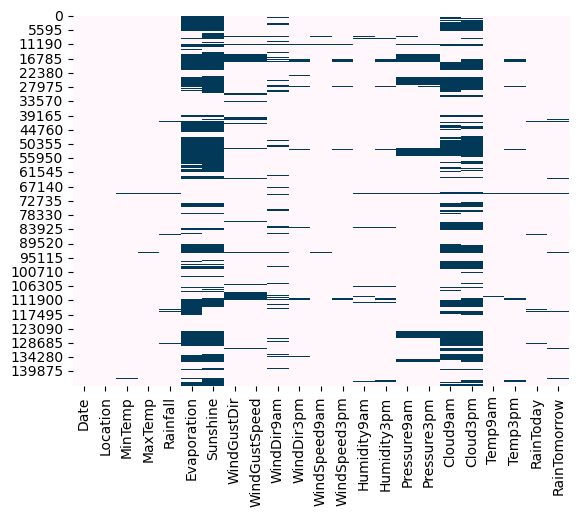

In [12]:
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [13]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [15]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [16]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.2,11.6,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,8.0,5.0,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,3.8,8.5,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,8.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,6.4,5.8,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,8.0,7.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,3.0,6.1,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,1.0,8.0,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,0.6,9.7,W,28.0,S,...,58.0,27.0,1007.0,1005.7,1.0,3.0,20.1,28.2,Yes,No


In [17]:
print(continuous_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


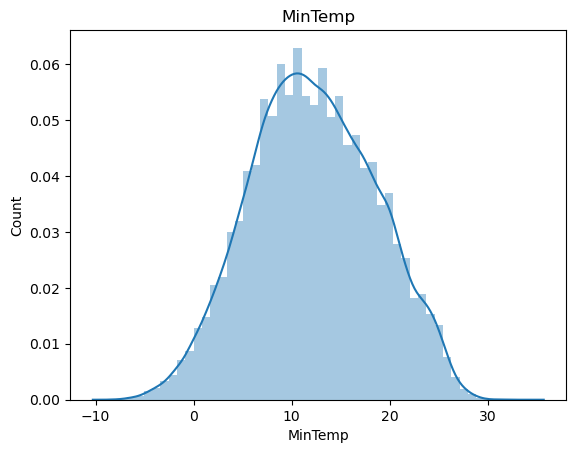

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


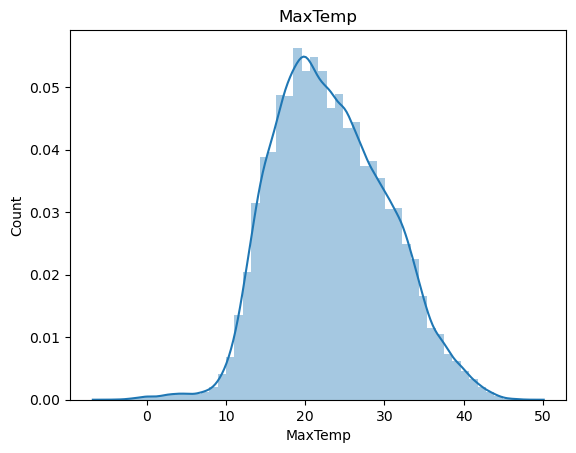

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


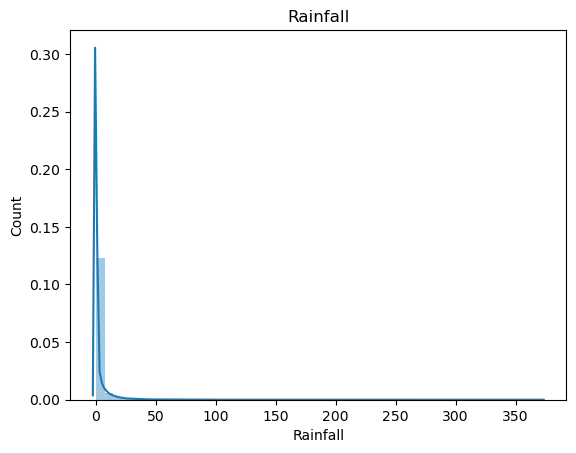

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


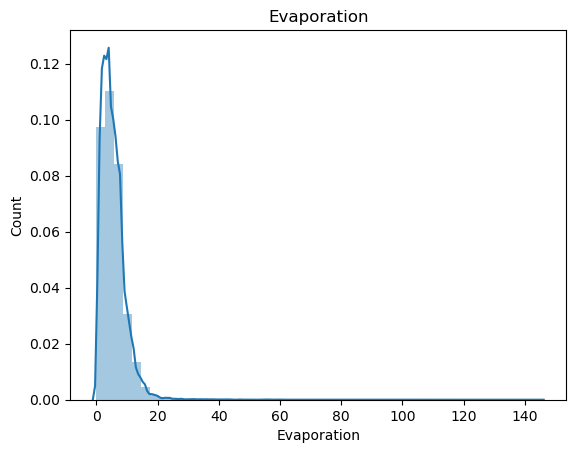

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


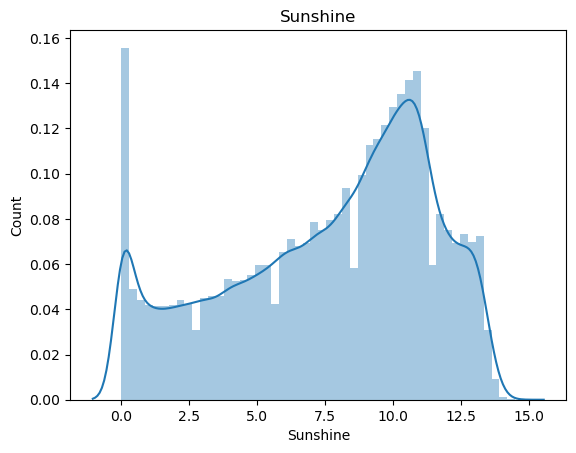

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


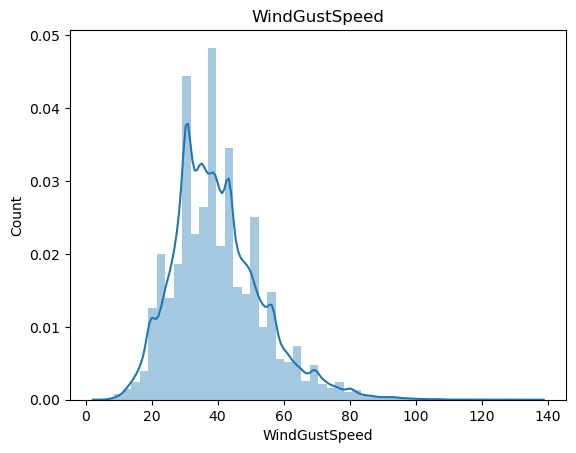

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


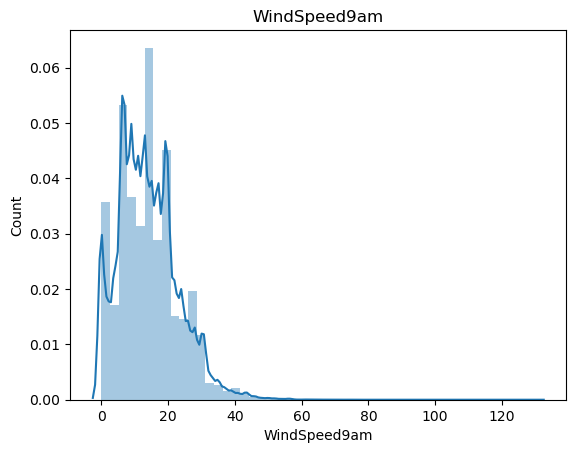

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


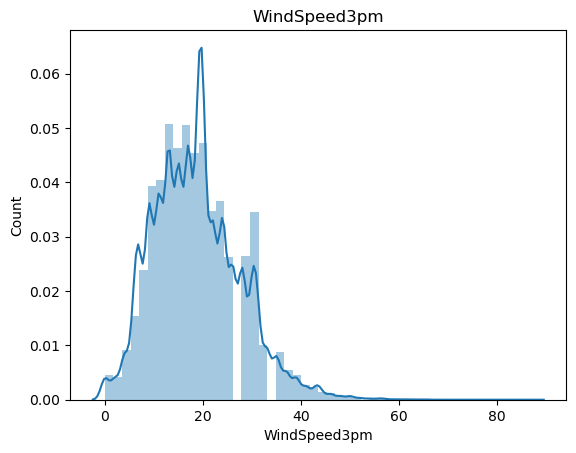

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


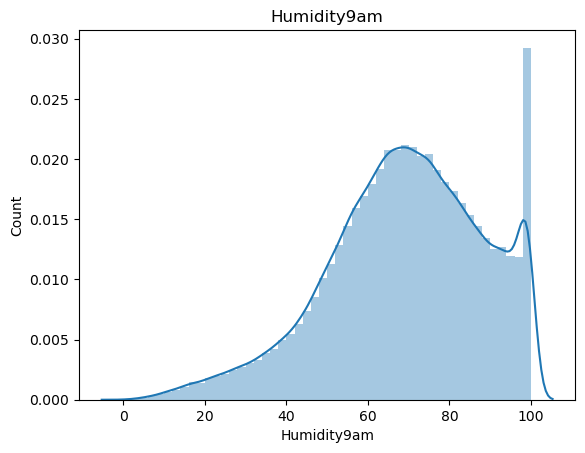

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


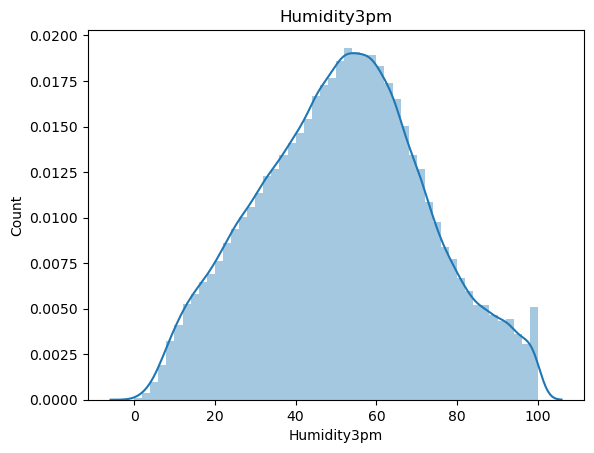

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


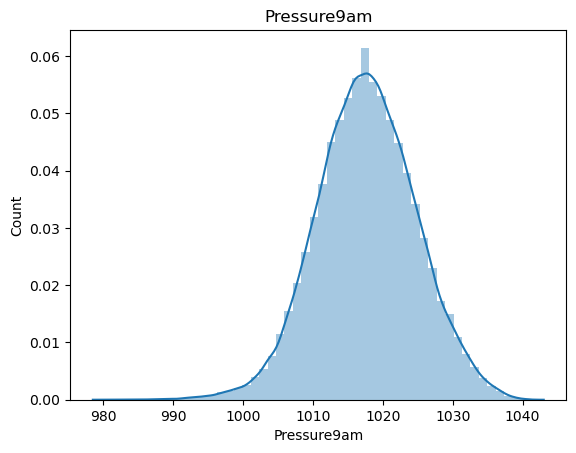

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


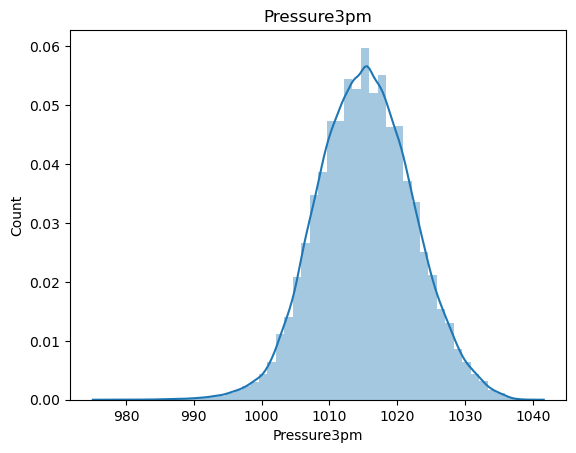

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


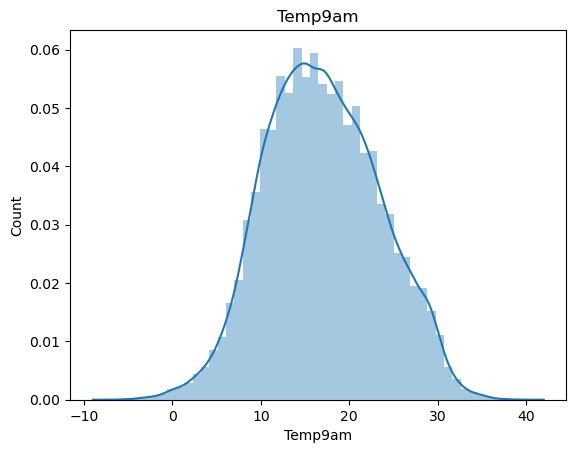

<Figure size 1500x1500 with 0 Axes>

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


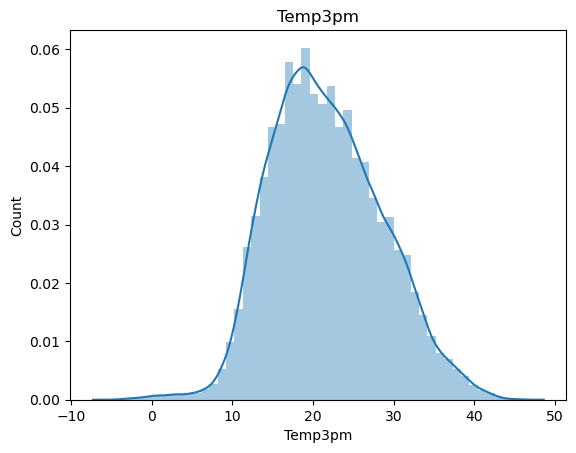

<Figure size 1500x1500 with 0 Axes>

In [18]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pranav\anaconda3\li

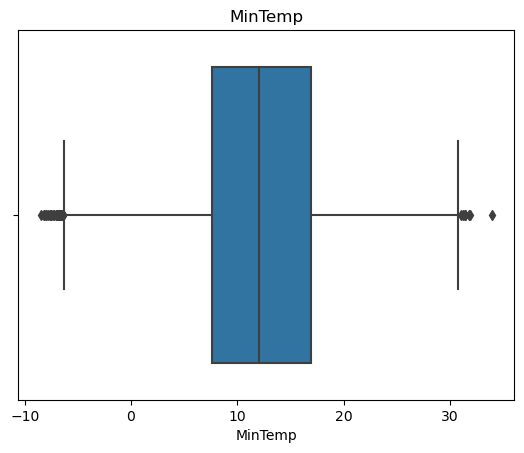

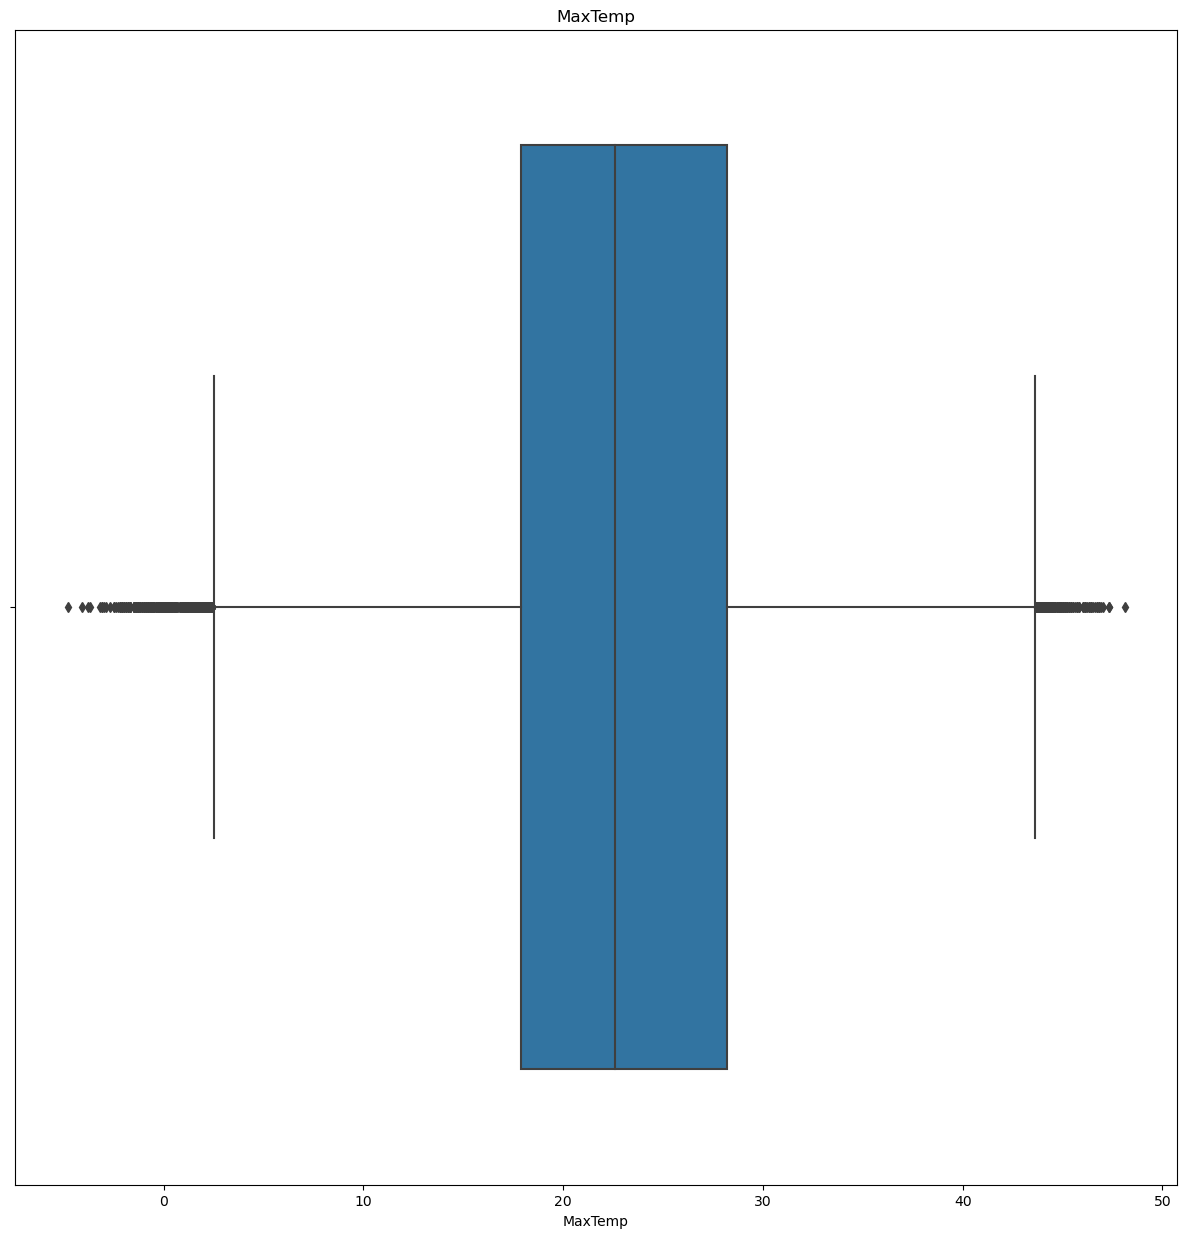

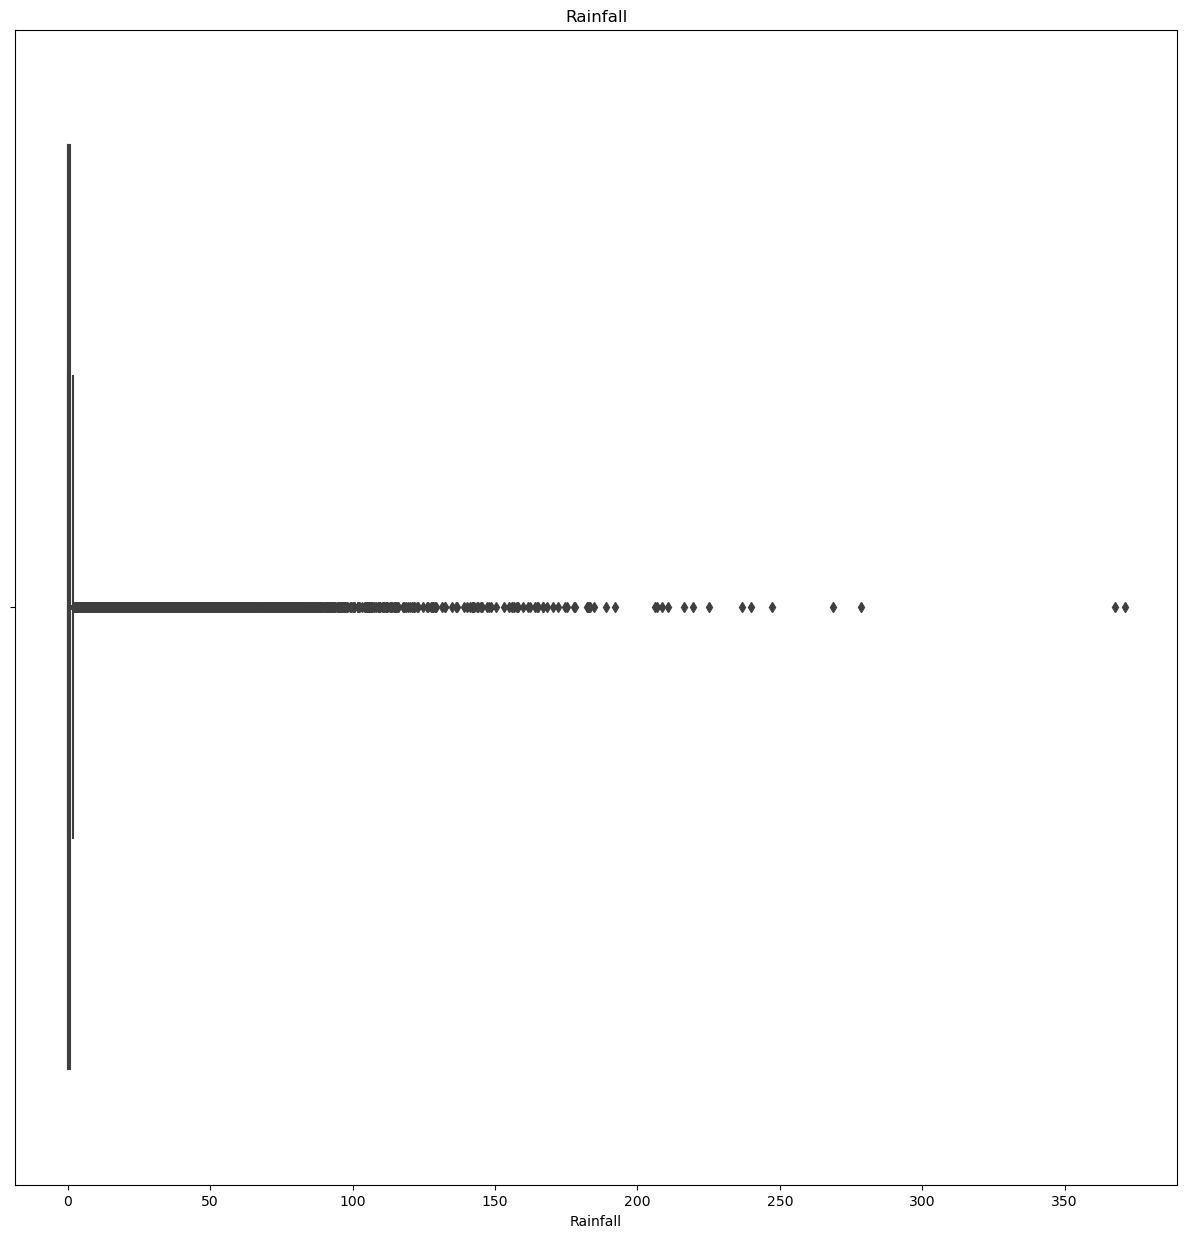

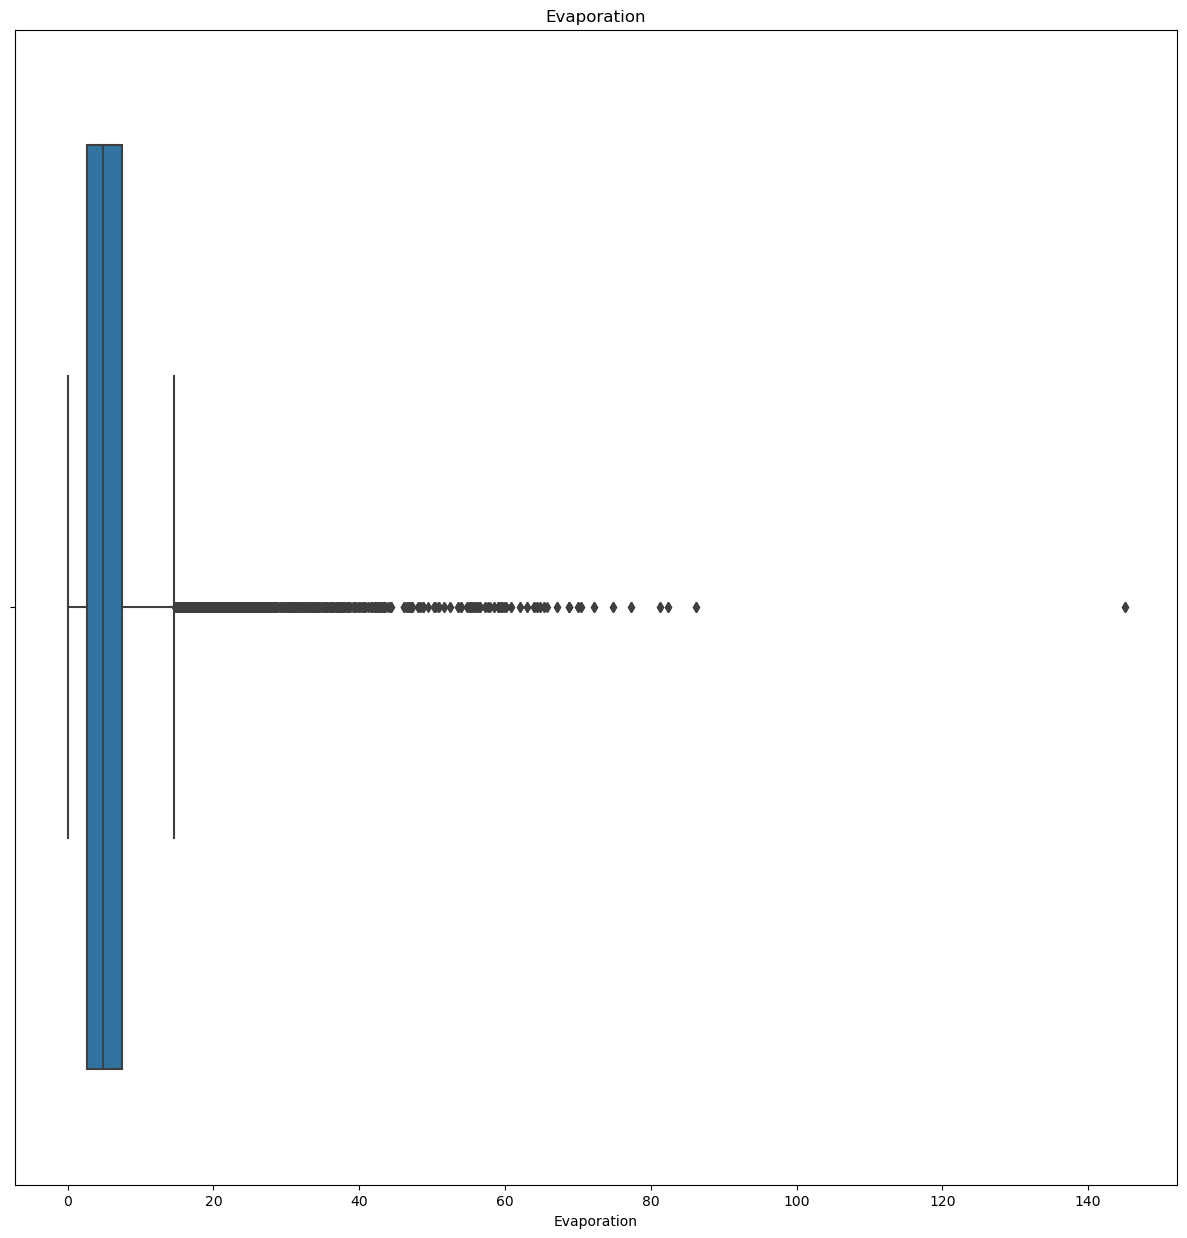

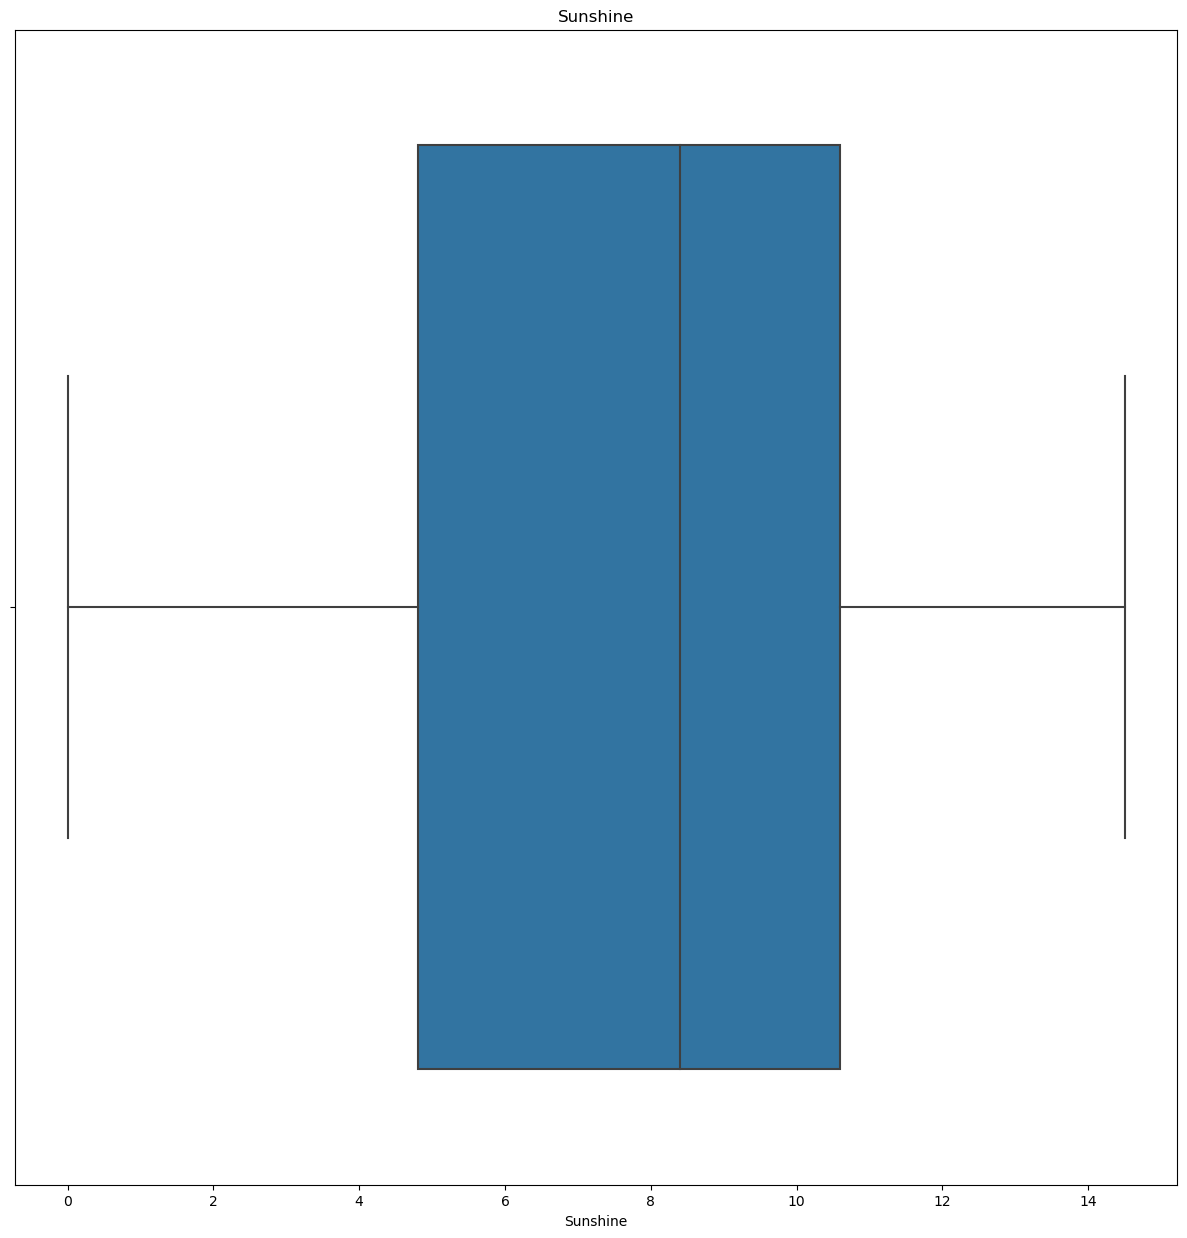

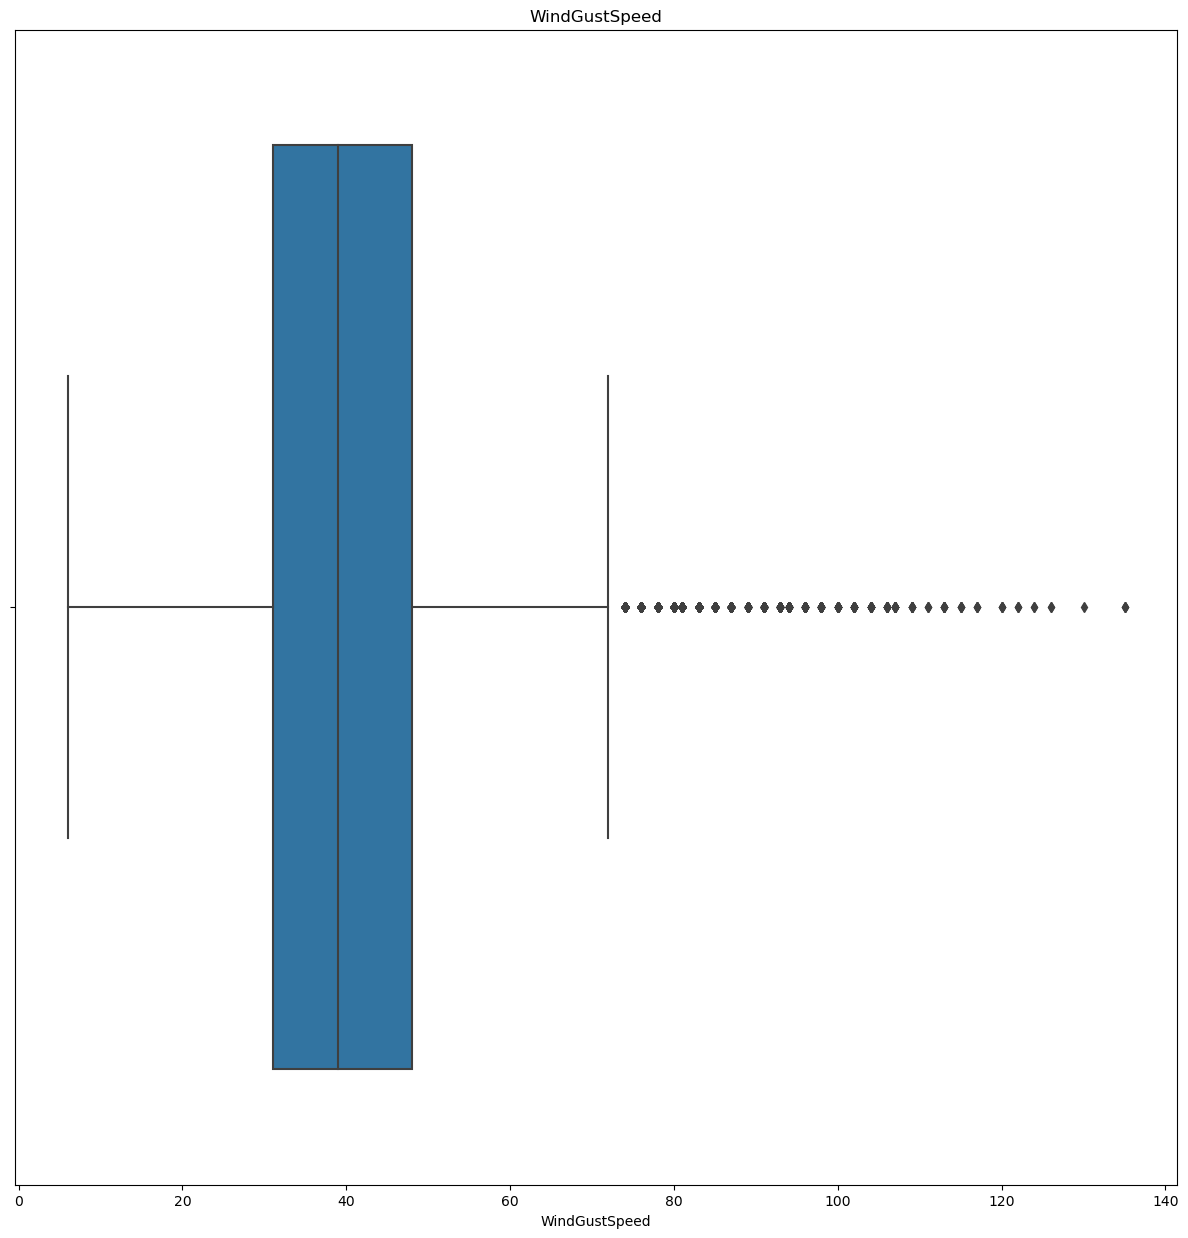

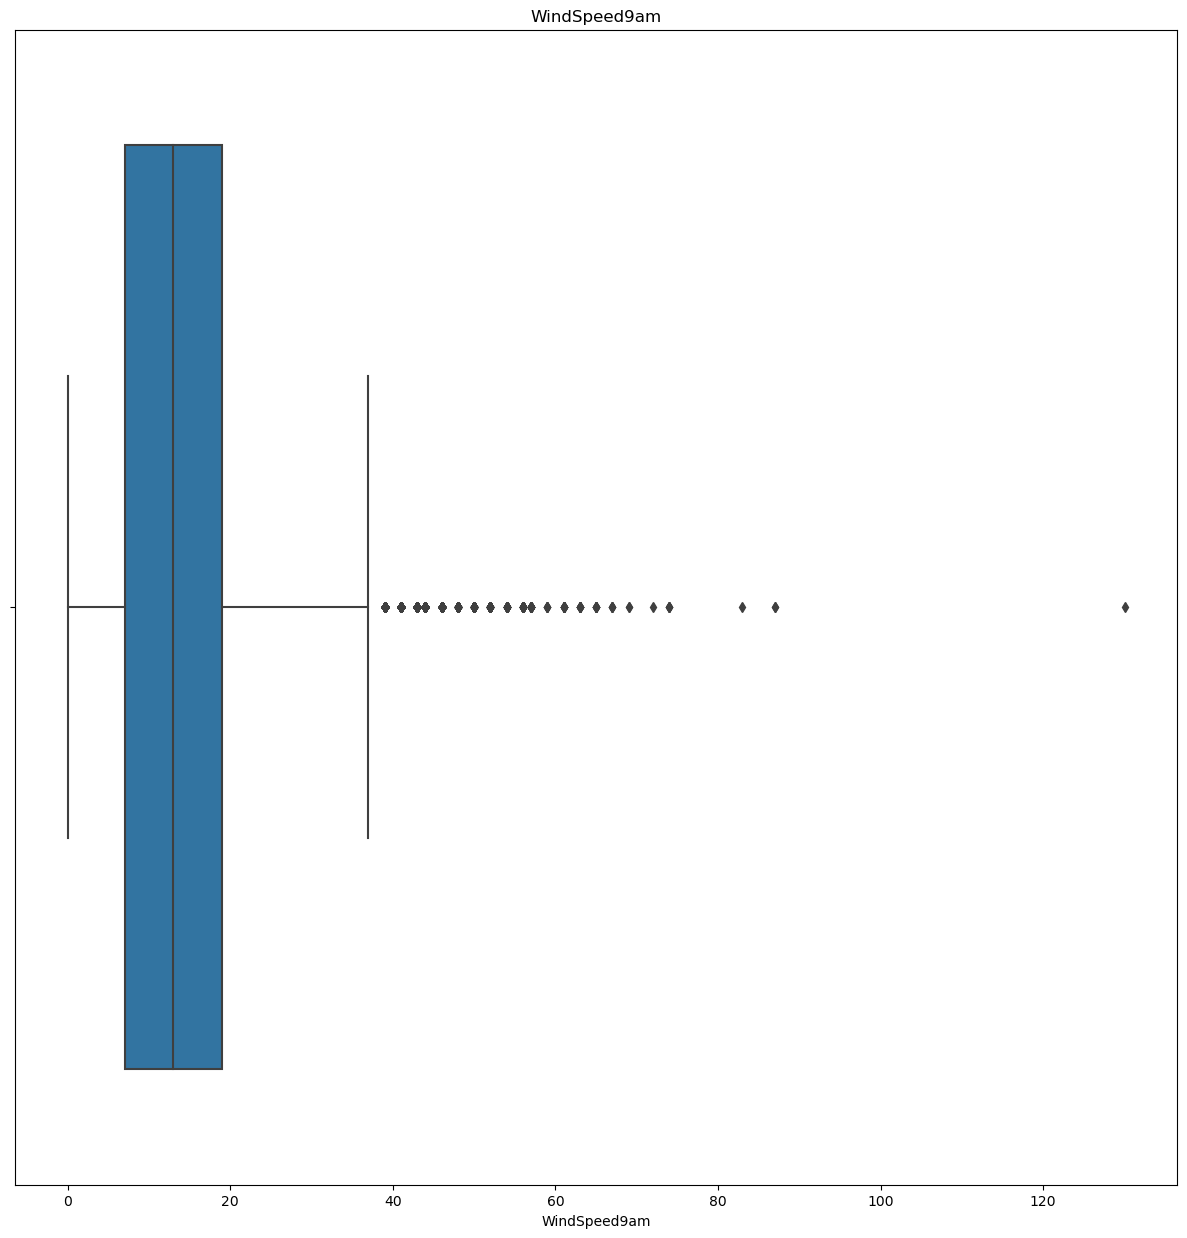

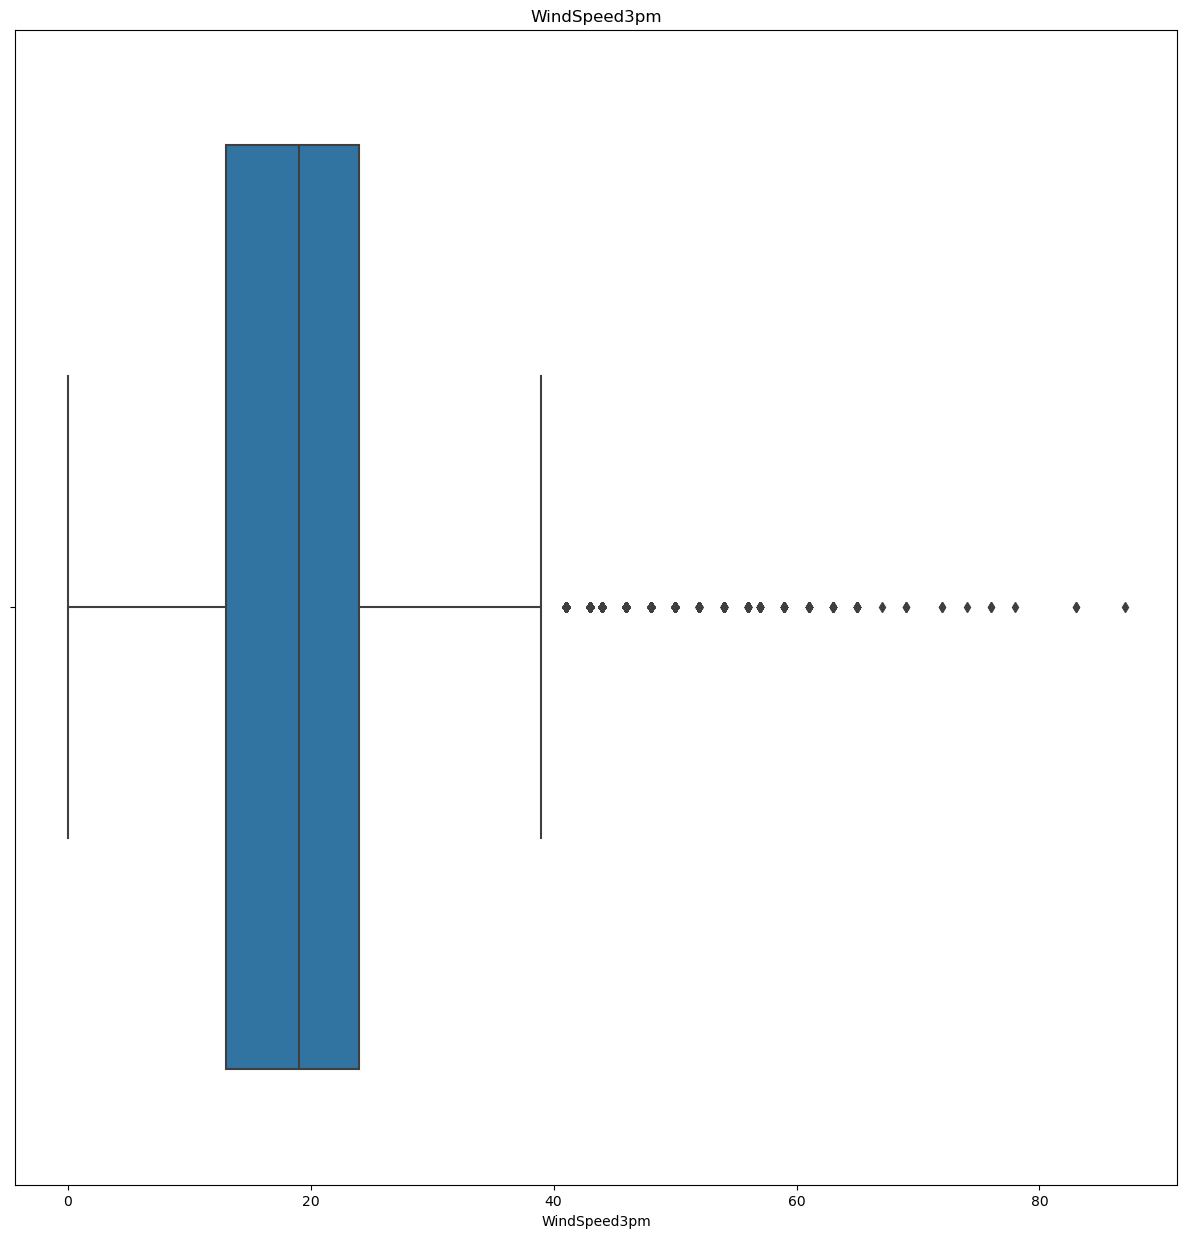

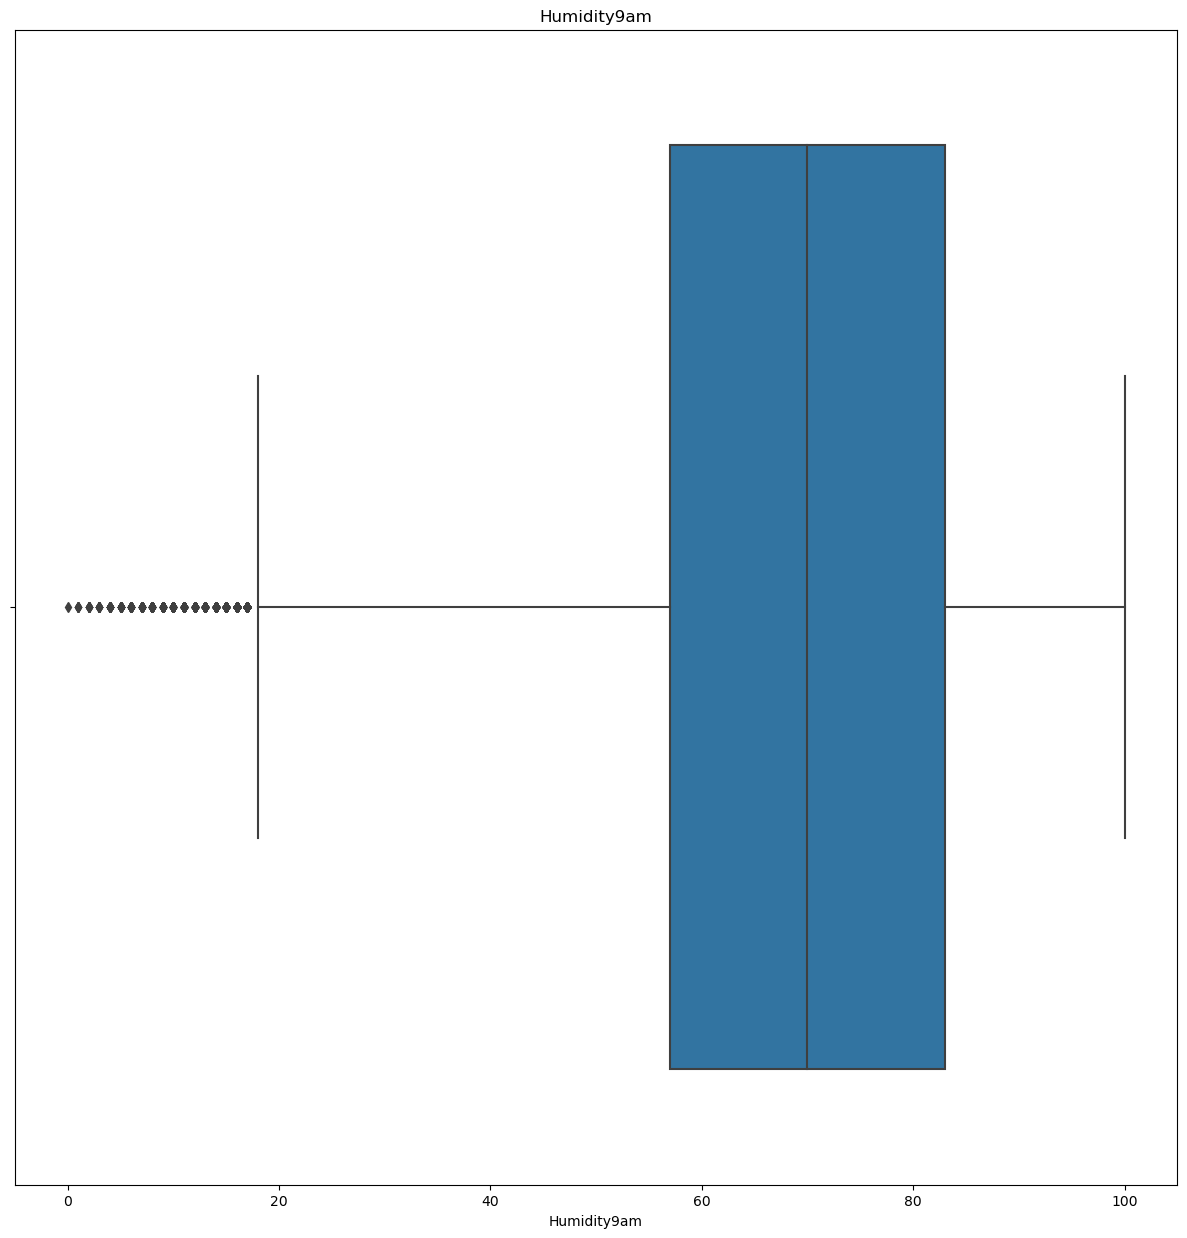

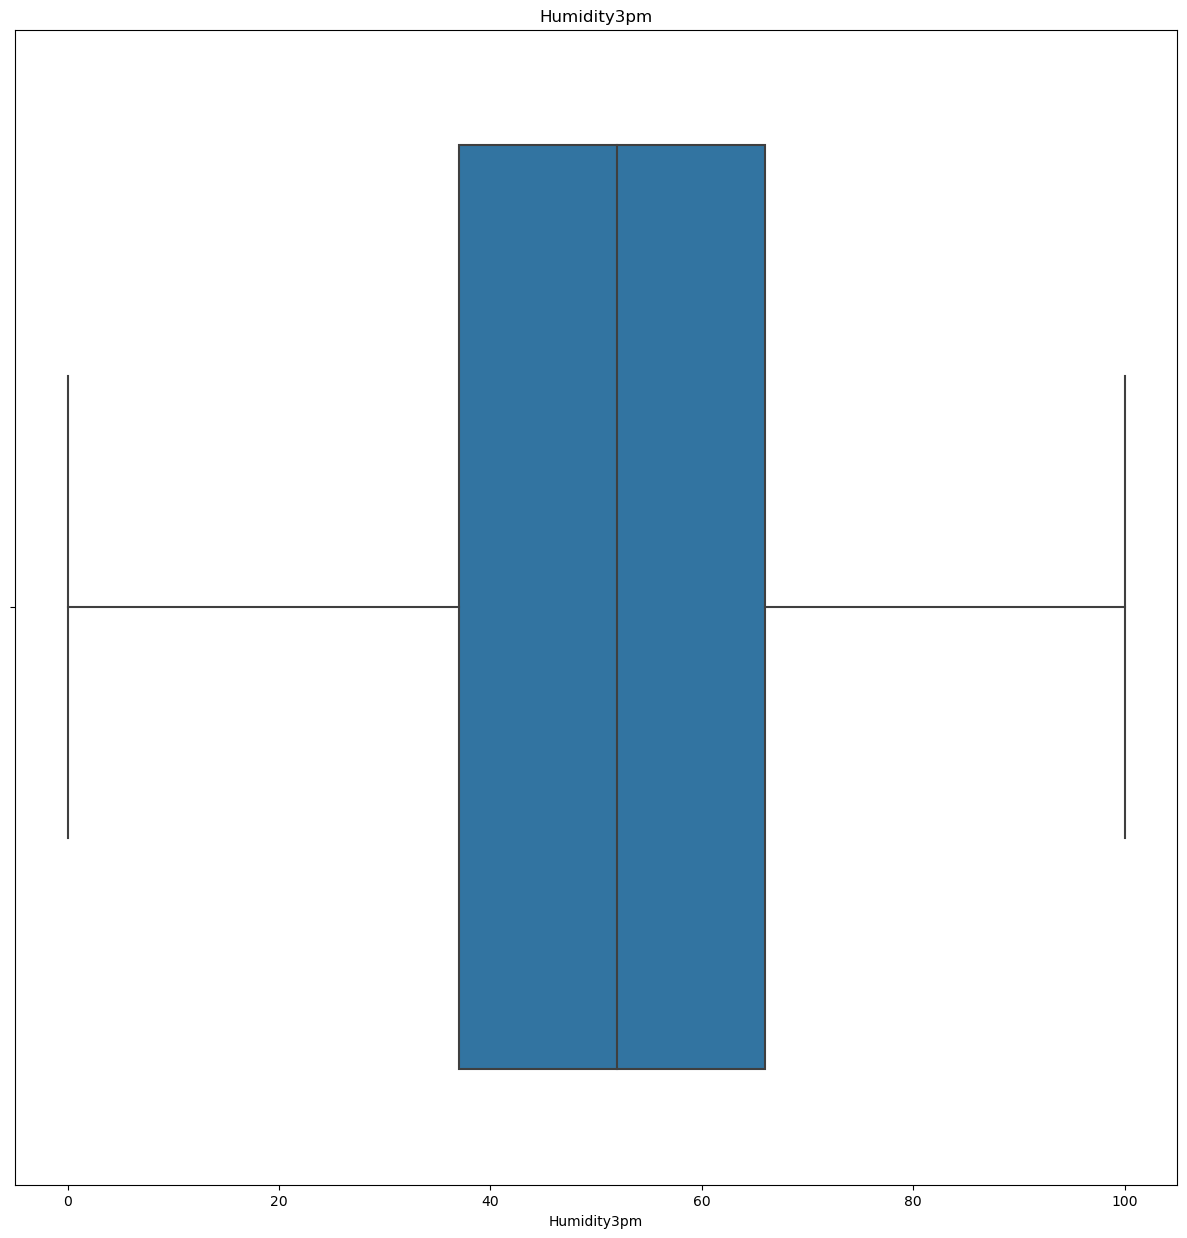

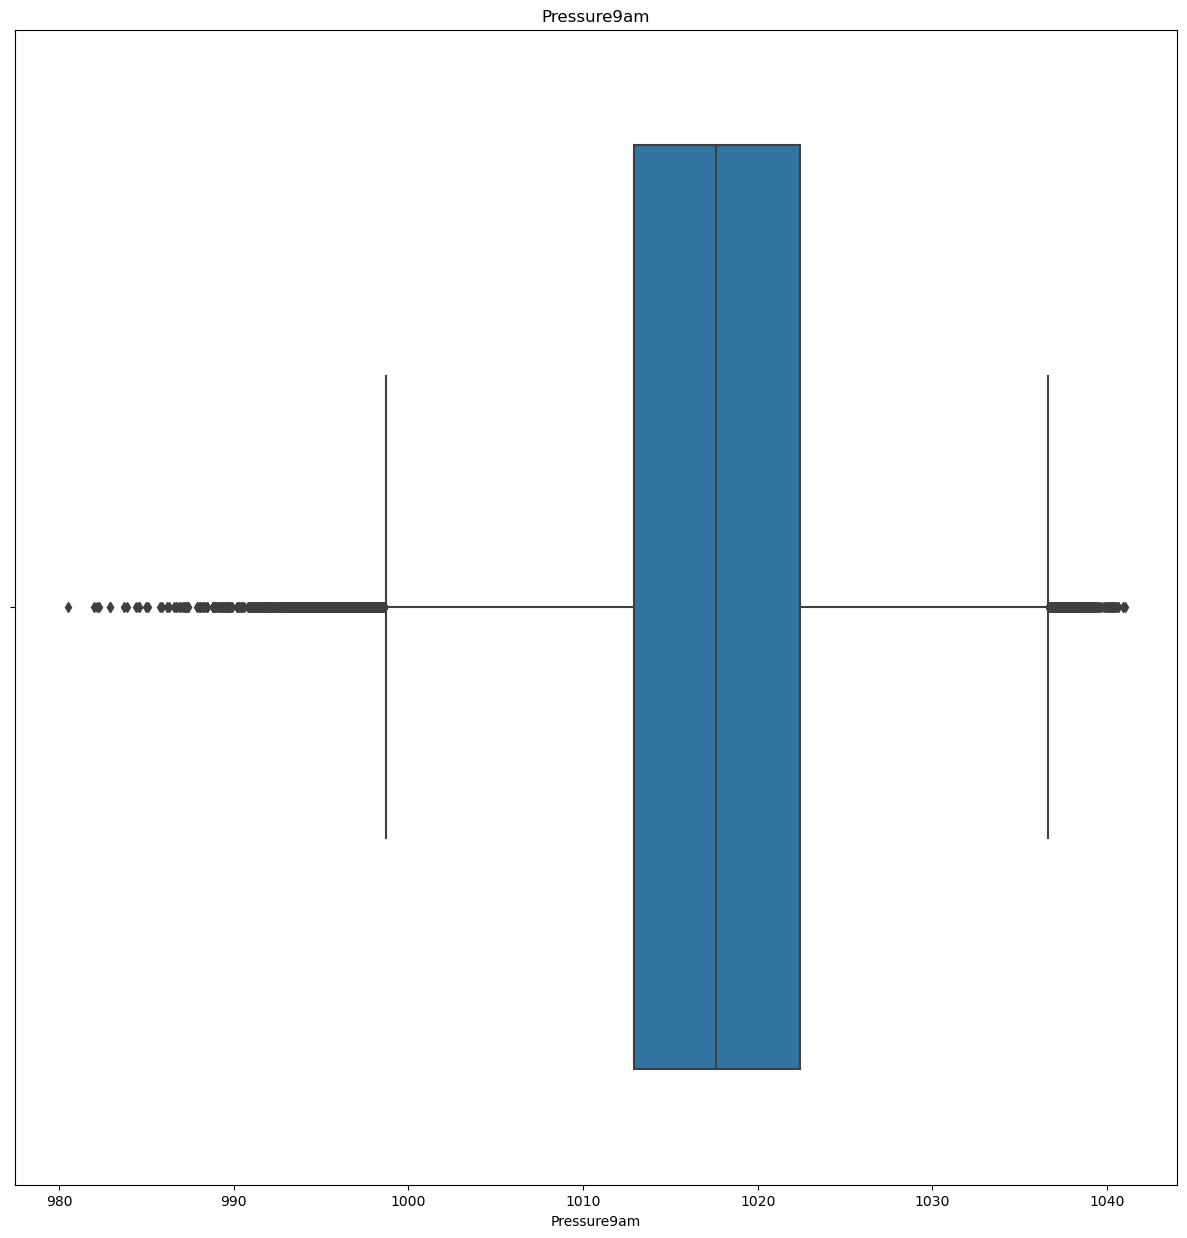

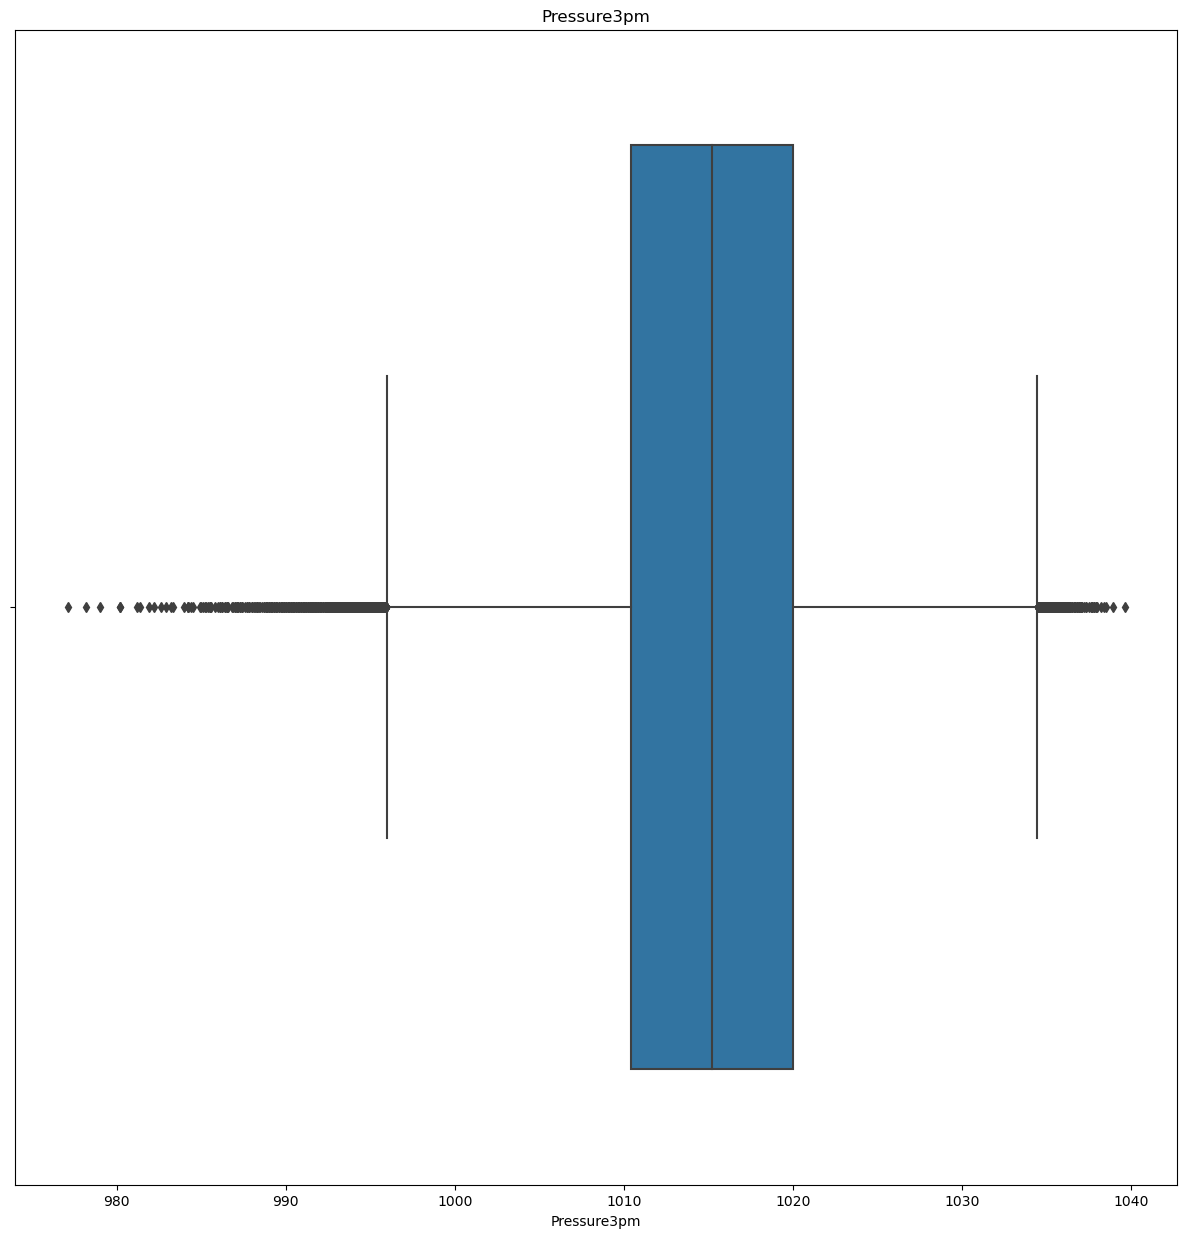

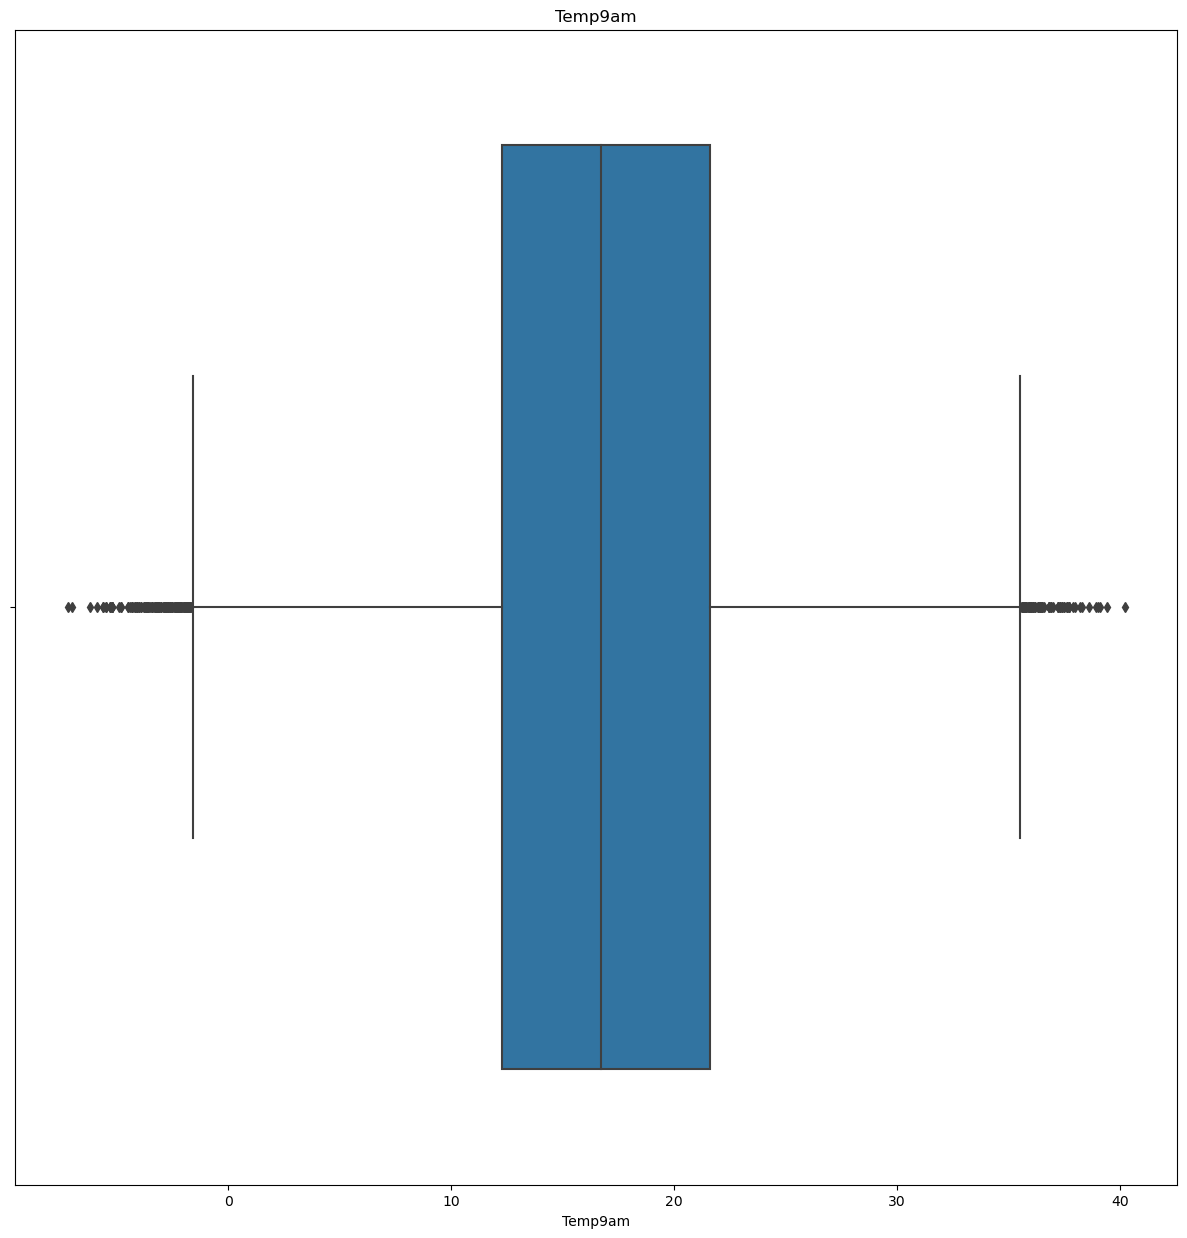

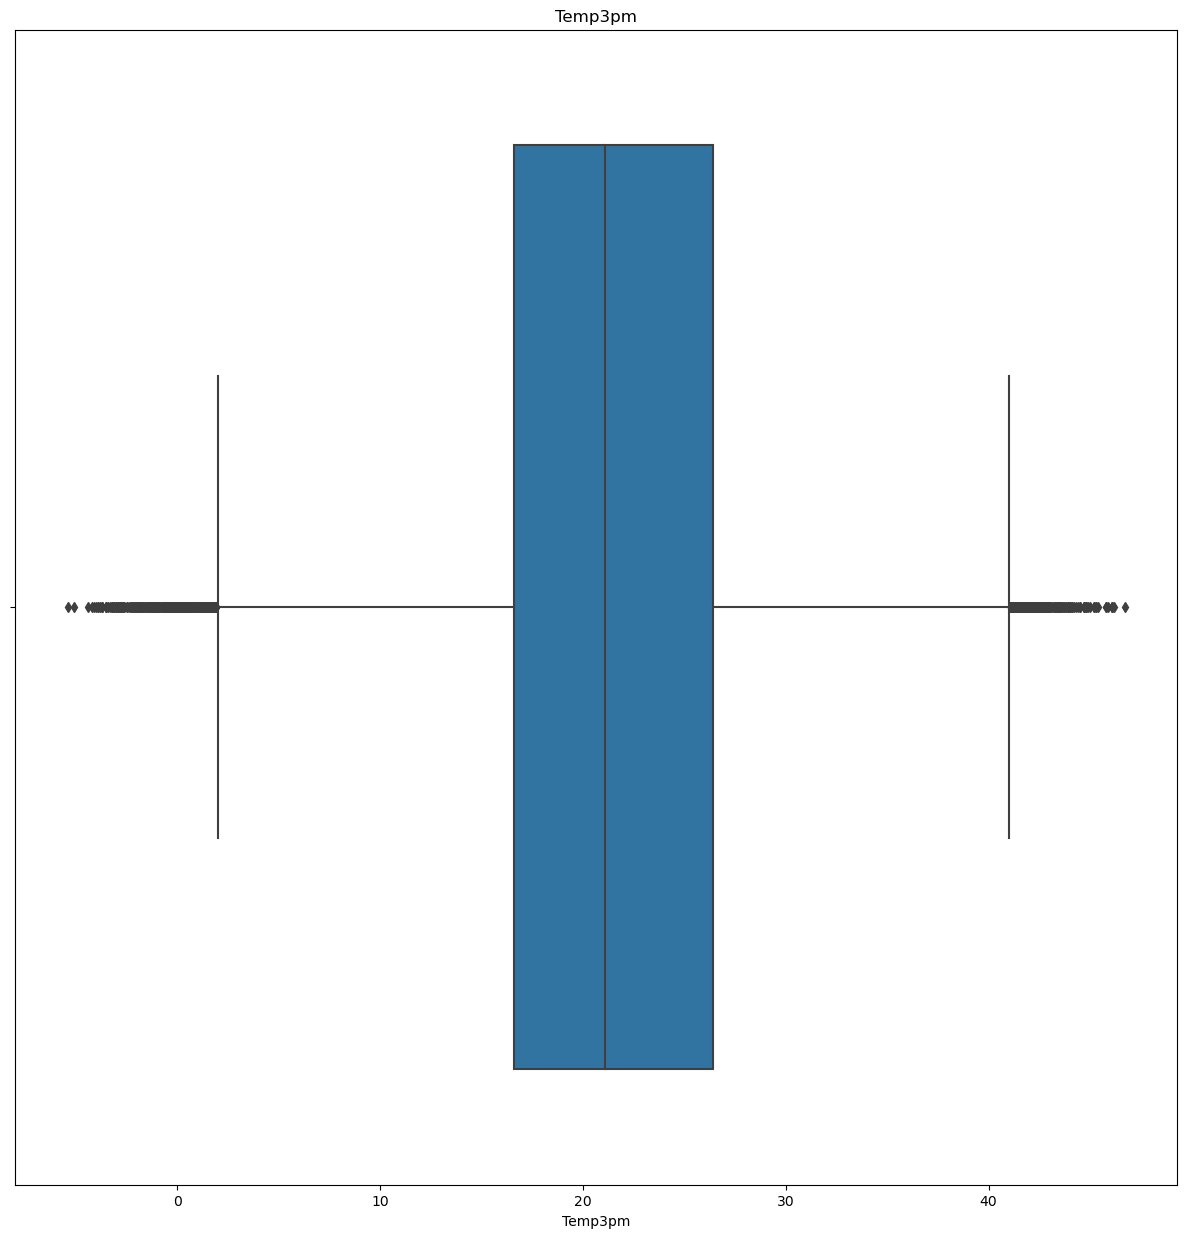

<Figure size 1500x1500 with 0 Axes>

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [20]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [21]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [22]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [23]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [24]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)


In [25]:
encoder = preprocessing.LabelEncoder() 
df['Location']= encoder.fit_transform(df['Location'])
df['WindGustDir']= encoder.fit_transform(df['WindGustDir']) 
df['WindDir9am']= encoder.fit_transform(df['WindDir9am']) 
df['WindDir3pm']= encoder.fit_transform(df['WindDir3pm'])

In [26]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [27]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [28]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,4,24.0,9,...,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,2008-12-06,2,14.6,29.7,0.2,5.2,11.6,14,56.0,13,...,55.0,23.0,1009.2,1005.4,8.0,5.0,20.6,28.9,0,0
6,2008-12-07,2,14.3,25.0,0.0,3.8,8.5,13,50.0,12,...,49.0,19.0,1009.6,1008.2,1.0,8.0,18.1,24.6,0,0
7,2008-12-08,2,7.7,26.7,0.0,6.4,5.8,13,35.0,10,...,48.0,19.0,1013.4,1010.1,8.0,7.0,16.3,25.5,0,0
8,2008-12-09,2,9.7,31.9,0.0,3.0,6.1,6,80.0,9,...,42.0,9.0,1008.9,1003.6,1.0,8.0,18.3,30.2,0,1
9,2008-12-10,2,13.1,30.1,1.4,0.6,9.7,13,28.0,8,...,58.0,27.0,1007.0,1005.7,1.0,3.0,20.1,28.2,1,0


In [29]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [30]:
df["Date_year"] = df["Date"].dt.year
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,13,44.0,13,...,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,14,44.0,6,...,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,15,46.0,13,...,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,4,24.0,9,...,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,1.4,7.8,0,31.0,9,...,1020.3,1.0,1.0,10.1,22.4,0,0,2017,6,21
145456,2017-06-22,41,3.6,25.3,0.0,7.6,13.5,6,22.0,9,...,1019.1,8.0,5.0,10.9,24.5,0,0,2017,6,22
145457,2017-06-23,41,5.4,26.9,0.0,6.8,11.0,3,37.0,9,...,1016.8,8.0,1.0,12.5,26.1,0,0,2017,6,23
145458,2017-06-24,41,7.8,27.0,0.0,2.6,13.2,9,28.0,10,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


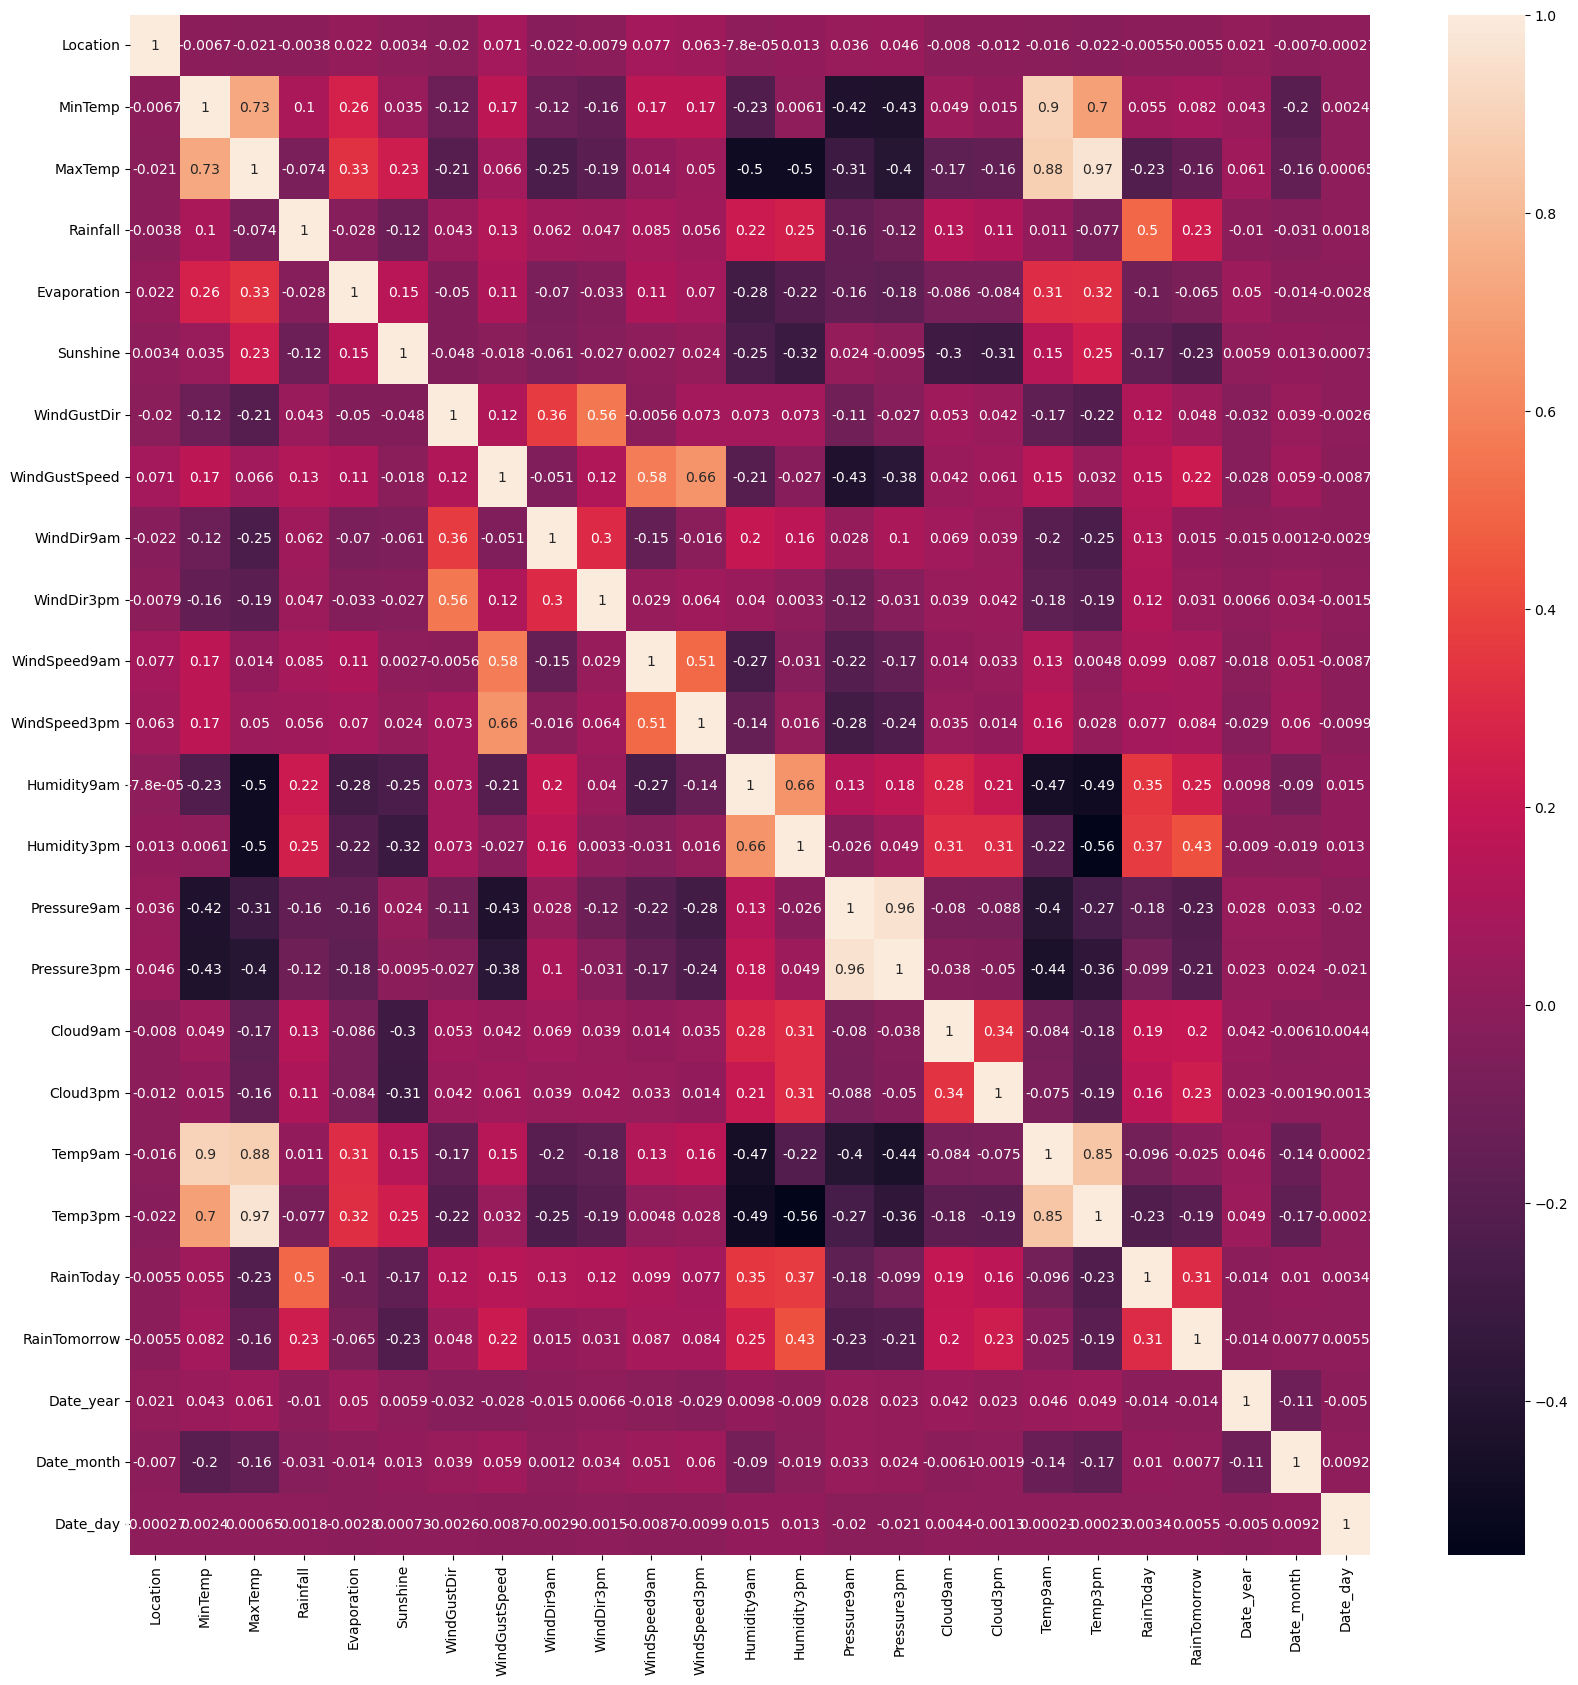

In [31]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [32]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


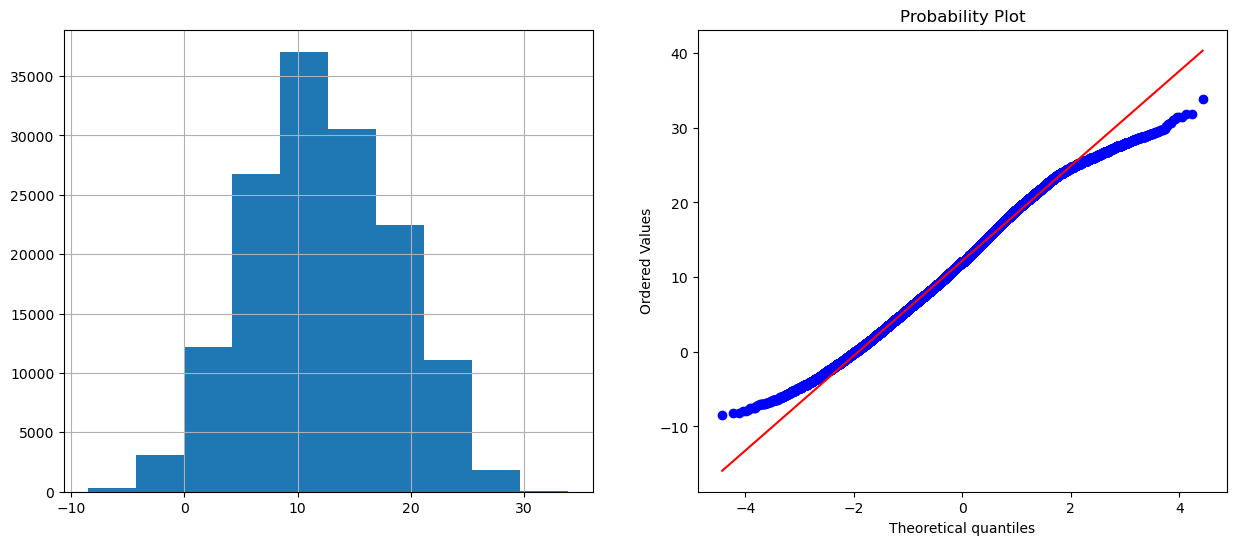

MaxTemp


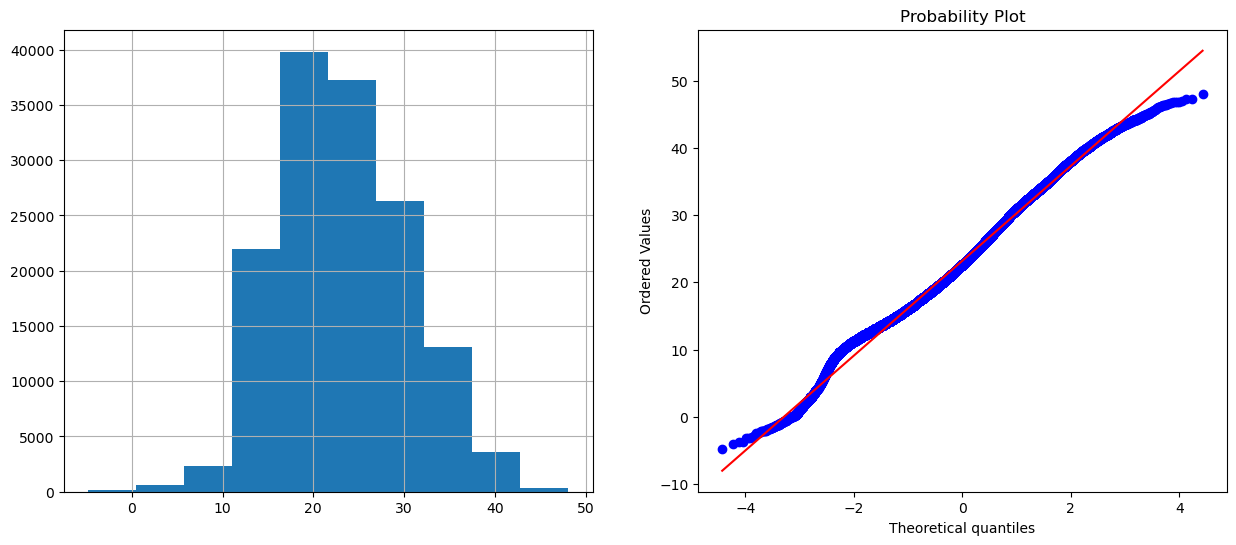

Rainfall


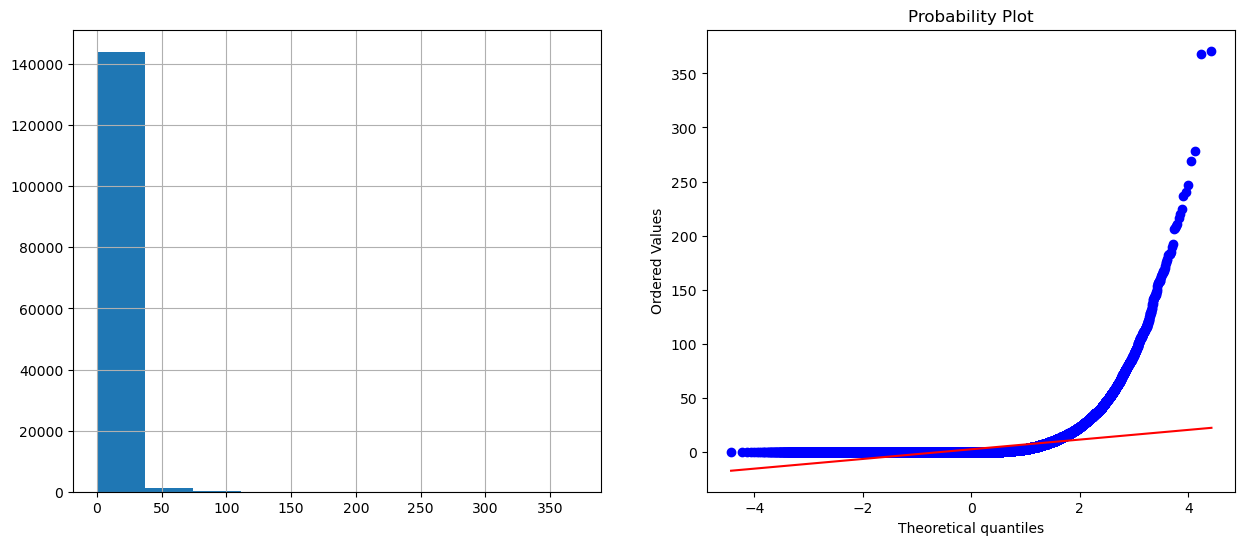

Evaporation


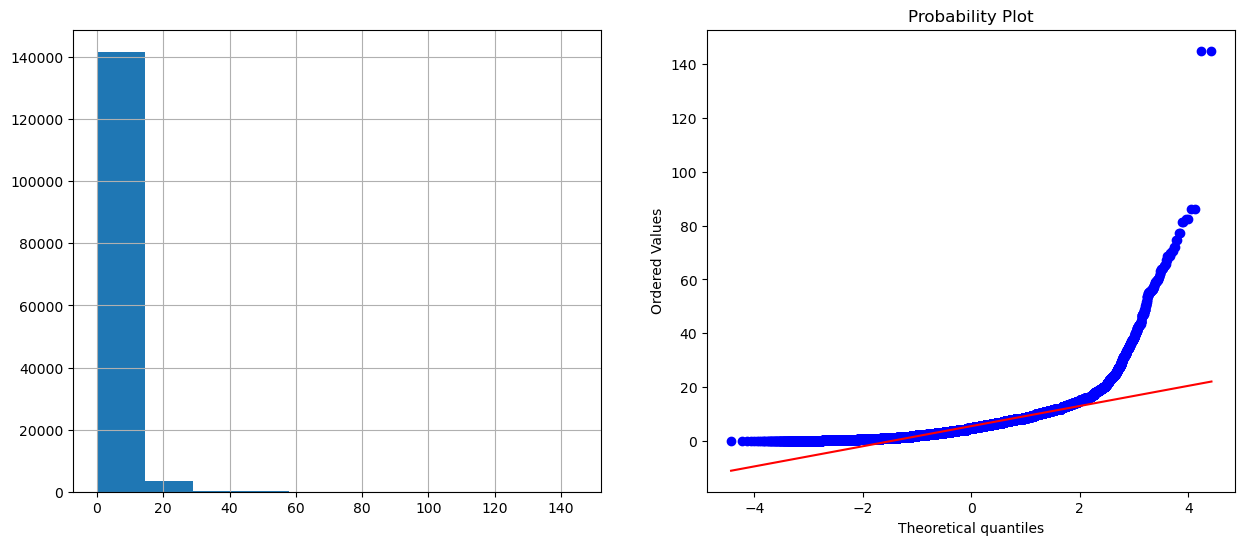

Sunshine


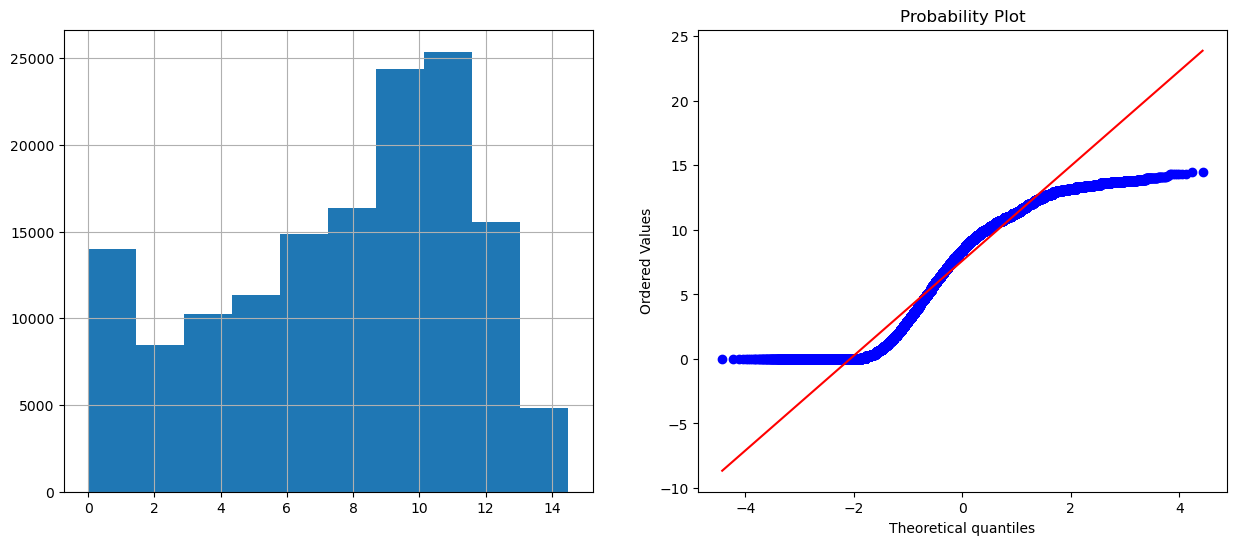

WindGustSpeed


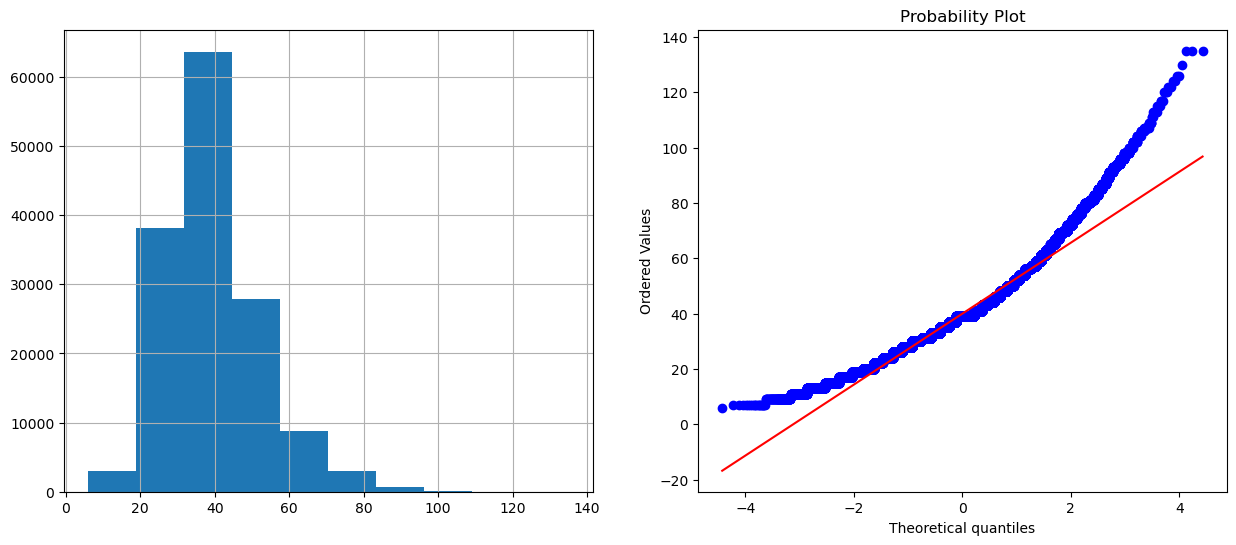

WindSpeed9am


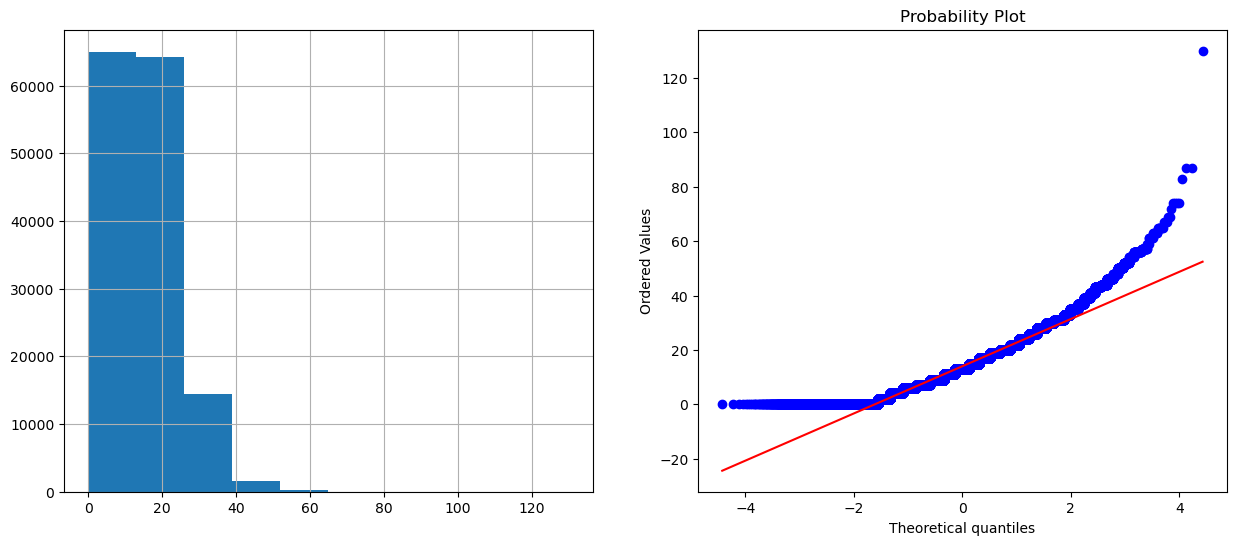

WindSpeed3pm


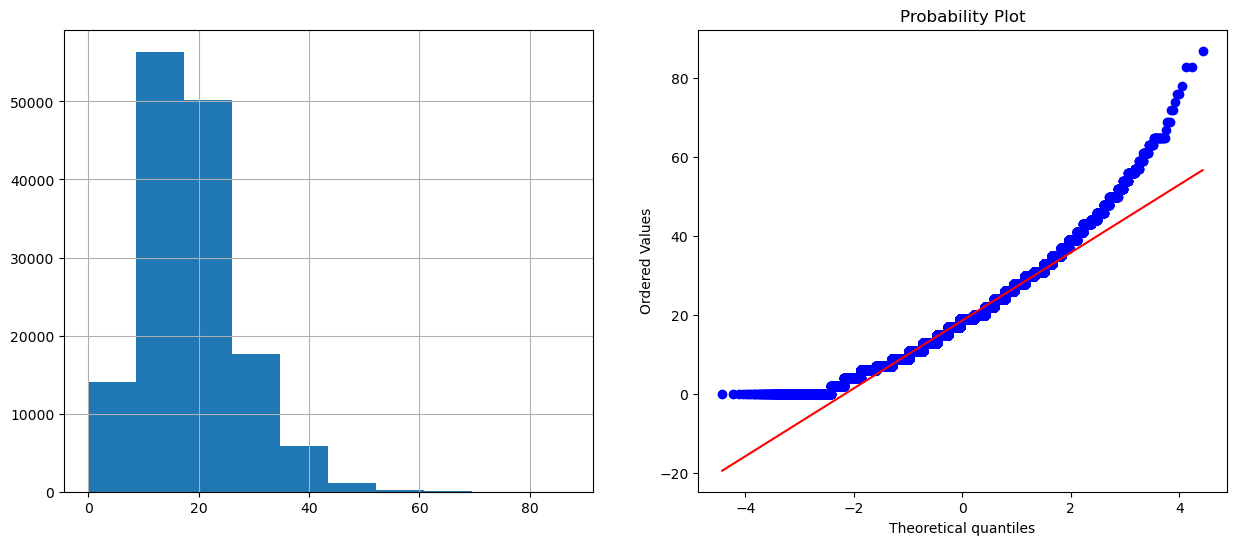

Humidity9am


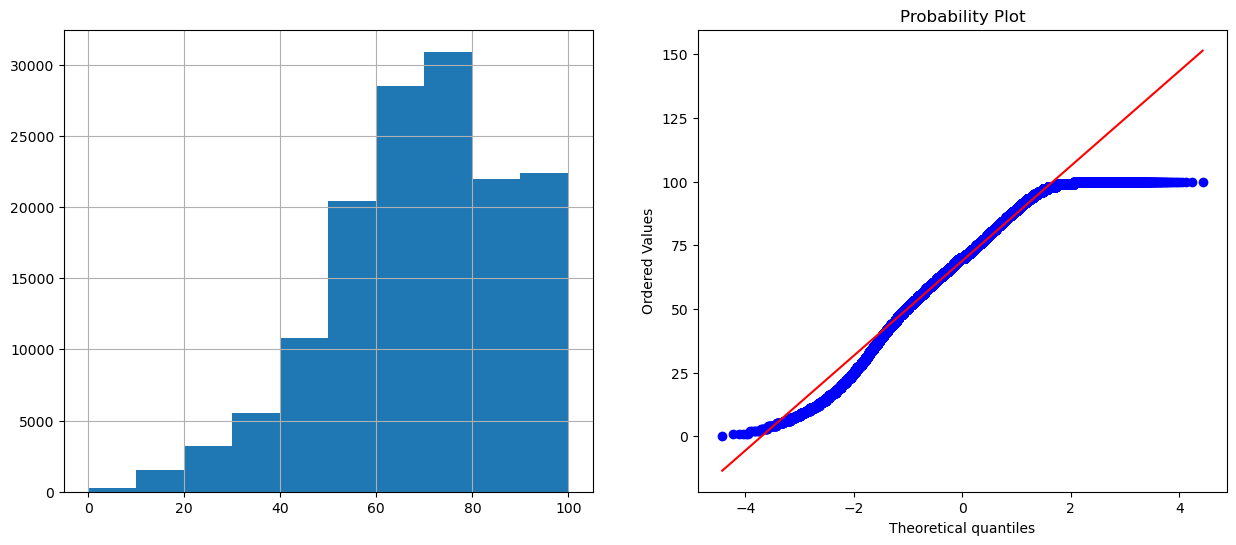

Humidity3pm


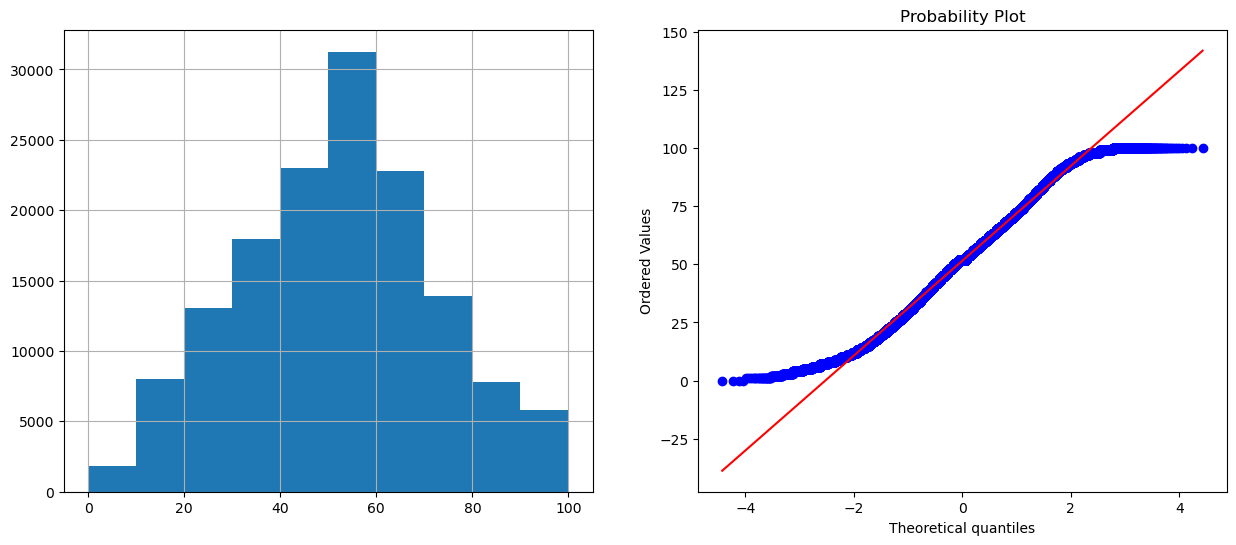

Pressure9am


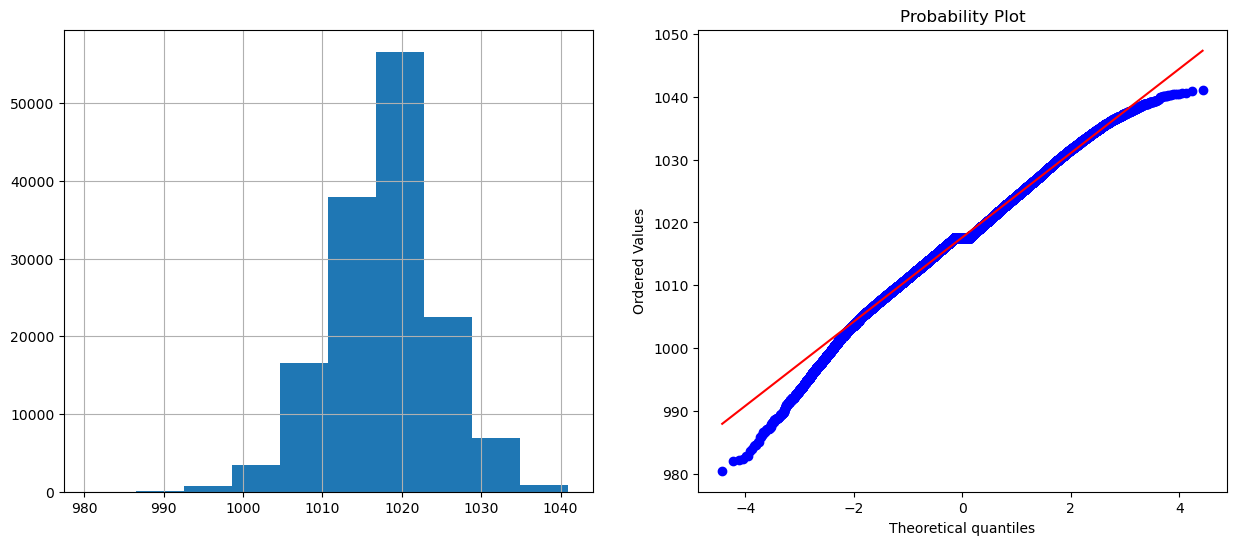

Pressure3pm


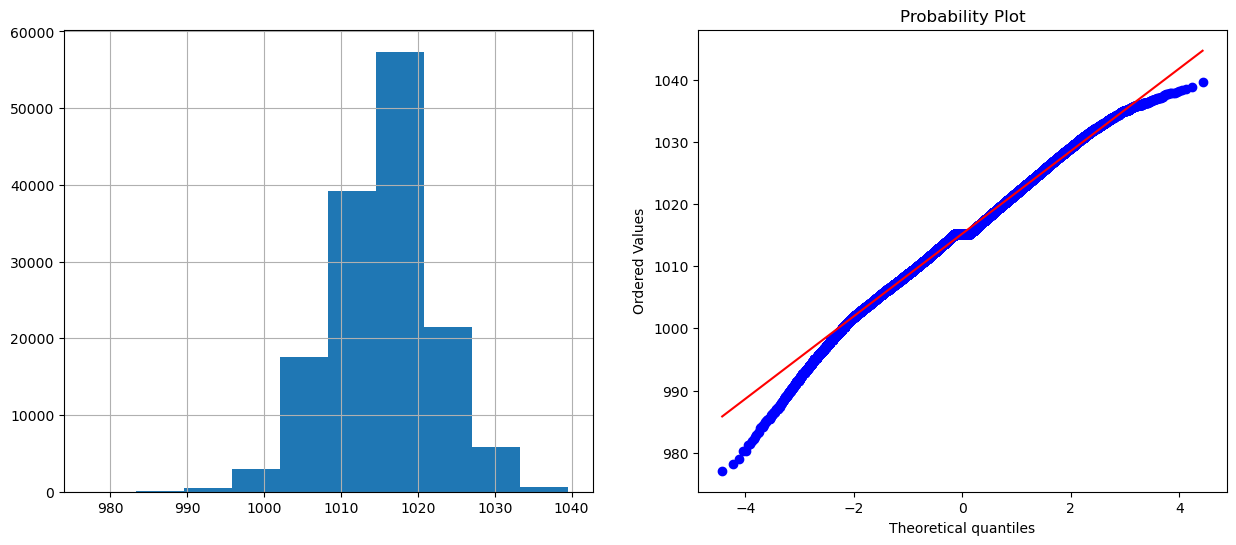

Temp9am


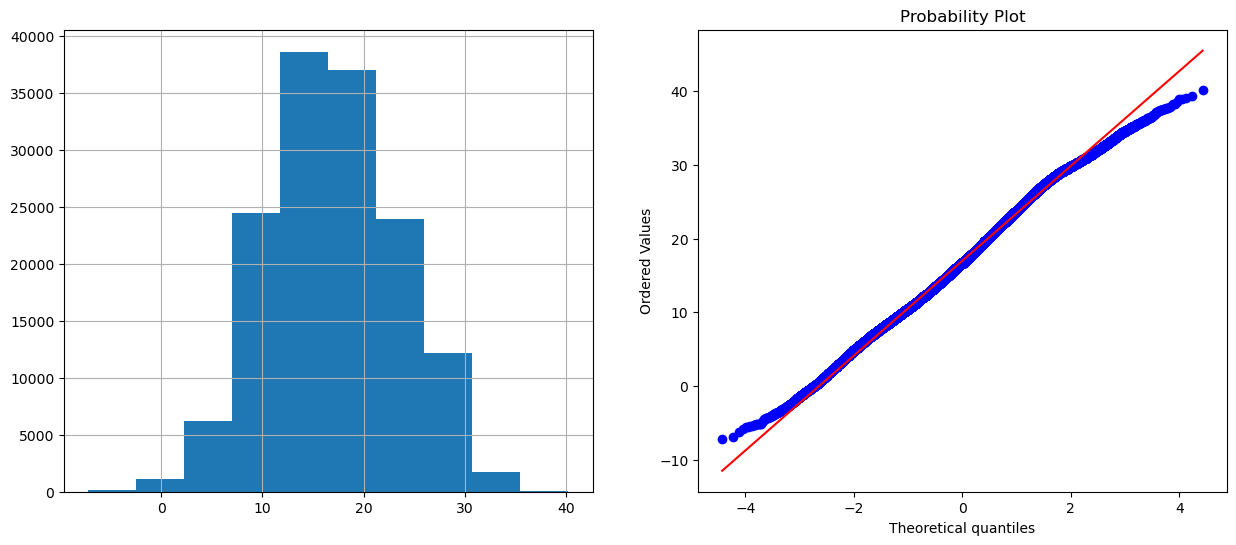

Temp3pm


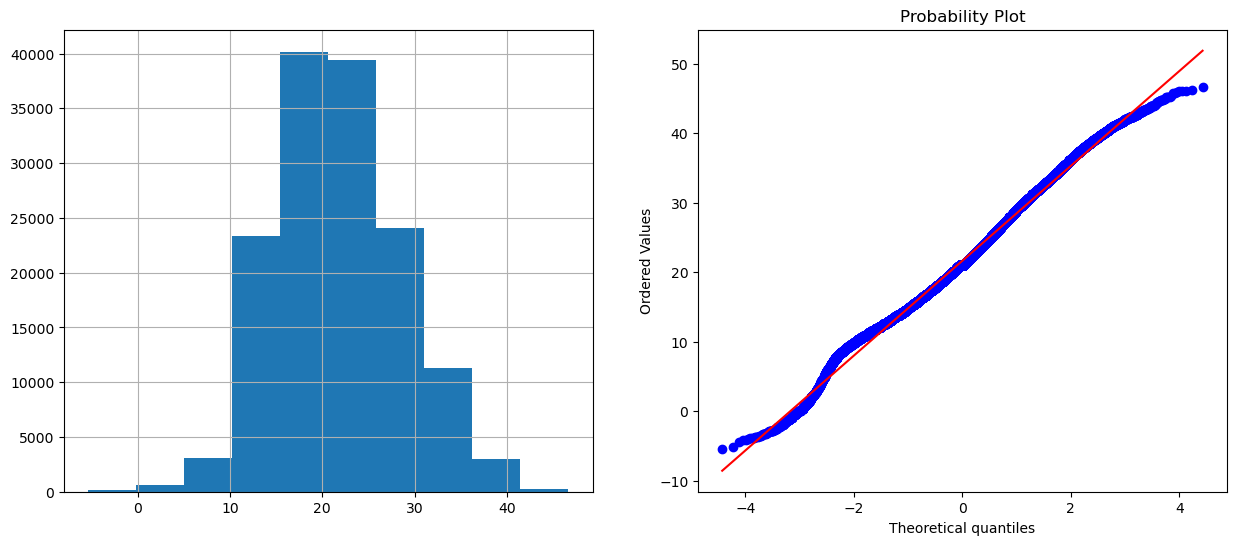

In [33]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [34]:
#df.to_csv("preprocessed.csv", index=False)

In [35]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, random_state = 0)

In [37]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_year,Date_month,Date_day
22926,27,18.8,23.7,0.2,5.0,7.3,2,52.0,2,2,...,1016.6,1013.9,5.0,7.0,21.4,22.2,0,2014,3,12
80735,44,9.3,24.0,0.2,1.6,10.9,4,48.0,6,5,...,1018.3,1014.6,3.0,5.0,14.3,23.2,0,2016,10,6
121764,31,10.9,22.2,1.4,1.2,9.6,12,26.0,16,12,...,1017.6,1014.9,1.0,2.0,16.6,21.5,1,2011,8,31
139821,13,19.3,29.9,0.0,9.2,11.0,2,43.0,2,0,...,1015.9,1012.1,1.0,1.0,23.2,29.1,0,2010,6,11
1867,2,15.7,17.6,12.4,6.0,2.9,0,20.0,2,0,...,1015.2,1010.5,8.0,8.0,16.5,17.3,1,2014,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,45,17.8,38.1,0.0,26.0,6.4,4,39.0,5,0,...,1014.5,1009.7,1.0,1.0,25.4,36.8,0,2015,12,20
97639,0,12.5,27.3,0.0,3.6,10.0,13,30.0,16,14,...,1019.2,1017.3,6.0,1.0,17.0,26.5,0,2012,3,11
95939,39,17.0,29.8,0.0,5.6,1.1,1,22.0,7,1,...,1019.6,1016.1,1.0,0.0,24.1,29.0,0,2016,6,10
117952,32,11.9,22.0,3.8,6.2,7.7,11,35.0,10,14,...,1020.0,1018.5,7.0,6.0,17.1,19.7,1,2009,11,20


In [38]:
y_train

22926     1
80735     0
121764    0
139821    0
1867      1
         ..
41993     0
97639     0
95939     0
117952    0
43567     0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [39]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90857, 1: 25511})
The number of classes after fit Counter({1: 90857, 0: 90857})


In [40]:
#!pip install catboost

In [41]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050309
0:	total: 268ms	remaining: 8m 55s
1:	total: 399ms	remaining: 6m 39s
2:	total: 513ms	remaining: 5m 41s
3:	total: 643ms	remaining: 5m 20s
4:	total: 750ms	remaining: 4m 59s
5:	total: 797ms	remaining: 4m 24s
6:	total: 836ms	remaining: 3m 57s
7:	total: 876ms	remaining: 3m 38s
8:	total: 917ms	remaining: 3m 22s
9:	total: 958ms	remaining: 3m 10s
10:	total: 1.01s	remaining: 3m 2s
11:	total: 1.05s	remaining: 2m 54s
12:	total: 1.15s	remaining: 2m 55s
13:	total: 1.2s	remaining: 2m 50s
14:	total: 1.25s	remaining: 2m 45s
15:	total: 1.32s	remaining: 2m 43s
16:	total: 1.39s	remaining: 2m 42s
17:	total: 1.51s	remaining: 2m 46s
18:	total: 1.64s	remaining: 2m 51s
19:	total: 1.75s	remaining: 2m 53s
20:	total: 1.82s	remaining: 2m 51s
21:	total: 1.94s	remaining: 2m 54s
22:	total: 2.04s	remaining: 2m 55s
23:	total: 2.12s	remaining: 2m 54s
24:	total: 2.24s	remaining: 2m 56s
25:	total: 2.32s	remaining: 2m 55s
26:	total: 2.43s	remaining: 2m 57s
27:	total: 2.55s	remaining: 2m 59s
28

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21521  1205]
 [ 2823  3543]]
0.8615426921490444
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.75      0.56      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.85      0.86      0.85     29092



C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7517637274209505

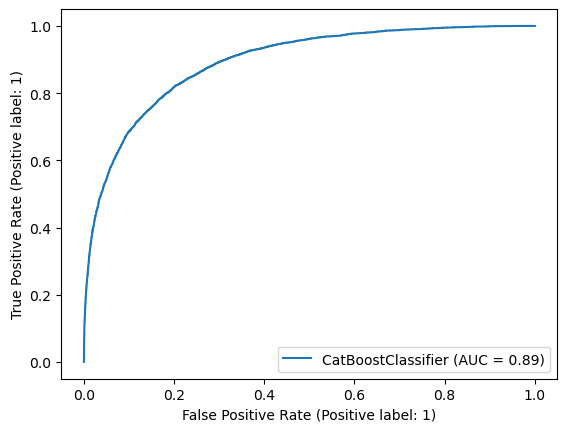

In [44]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [47]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20626  2100]
 [ 2491  3875]]
0.8421902928640176
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22726
           1       0.65      0.61      0.63      6366

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.76     29092
weighted avg       0.84      0.84      0.84     29092



C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7581486536227493

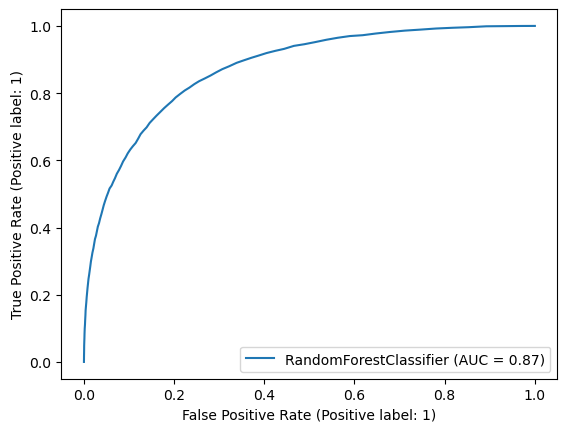

In [48]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17957  4769]
 [ 1564  4802]]
0.7823112883266877
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22726
           1       0.50      0.75      0.60      6366

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.73     29092
weighted avg       0.83      0.78      0.80     29092



C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7722360362956323

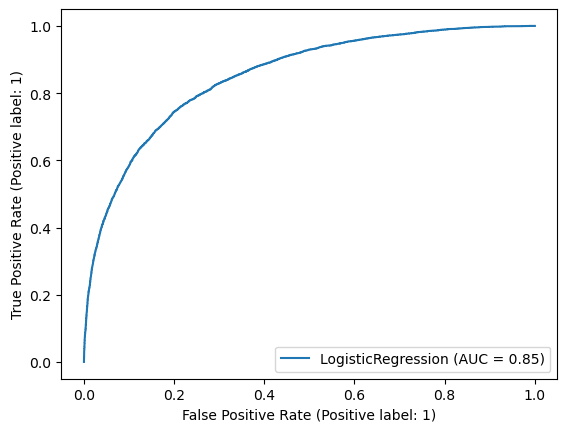

In [52]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [53]:
#pip install xgboost

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_pred3 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[21389  1337]
 [ 2864  3502]]
0.8555960401484944
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22726
           1       0.72      0.55      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7456393323027661

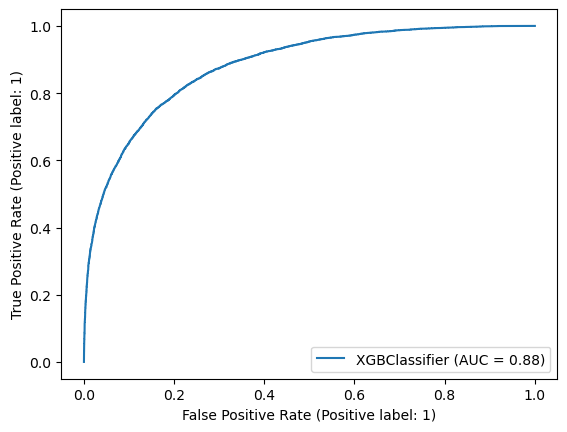

In [57]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [58]:
import joblib

In [59]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']